#### Pregunta 3:
## Predicción del Precio de una Casa

(a) Construcción del dataframe, el dataset contiene 14 atributos para describir propiedades, de estos 14 atributos el ultimo es el que desamos predecir (MEDV, valor medio de las viviendas).

atributos:
1. CRIM: tasa de criminalidad per cápita por municipio 
2. ZN: proporción de suelo residencial dividido en zonas para las porciones de más de 25.000 pies cuadrados 
3. INDUS: proporción de acres de negocios no minoristas por ciudad 
4. CHAS: Charles River variable ficticia (= 1 si sale del tracto río; 0 en caso contrario) 
5. NOX: la concentración de óxidos de nitrógeno (partes por 10 millones) 
6. RM: promedio número de habitaciones por vivienda 
7. EDAD: proporción de unidades ocupadas por el propietario construyó antes de 1940 
8. DIS: distancias ponderadas a cinco centros de empleo de Boston 
9. RAD: índice de accesibilidad a las autopistas radiales 
10. iMPUESTOS: valor total de impuestos sobre bienes tasa por $ 10,000 
11. PTRATIO: alumno-maestro por ciudad 
12. B: 1000 (Bk - 0,63) ^ 2 donde Bk es la proporción de los negros por ciudad 
13. LSTAT:% de estado inferior de la población 


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# Archivo CSV
url = 'DatasetCasa.csv'
#lectura
df = pd.read_csv(url, sep=' ',header=None, names=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX',
'RM', 'AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','MEDV'])
#separación entre datos de entrenemiento y datos de prueba
from sklearn.cross_validation import train_test_split
# 25% datos de prueba
df_train,df_test= train_test_split(df,test_size=0.25, random_state=0) 


/usr/local/lib/python2.7/dist-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


(b) Normalización de los datos, esto es conveniente debido a que las magnitudes de los atributos son muy variadas y de esta misma forma al inter-relacionar las dimensiones estas no arrastran unidades de medición.

In [2]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(df_train)
X_train_scaled = pd.DataFrame(scaler.transform(df_train),columns=df_train.columns)
scaler = StandardScaler().fit(df_test)
X_test_scaled = pd.DataFrame(scaler.transform(df_test),columns=df_test.columns)

y_train = df_train.pop('MEDV')
y_test = df_test.pop('MEDV')

(c) 

In [3]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.optimizers import SGD

model = Sequential()
model.add(Dense(200, input_dim=X_train_scaled.shape[1], init='uniform'))
model.add(Activation('sigmoid'))

model.add(Dense(1, init='uniform'))
model.add(Activation('linear'))

sgd = SGD(lr=0.01)
model.compile(optimizer=sgd,loss='mean_squared_error')

hist = model.fit(X_train_scaled.as_matrix(), y_train.as_matrix(), nb_epoch=300,
verbose = 1, validation_data=(X_test_scaled.as_matrix(), y_test.as_matrix()))
listaloss = []
                
for i in range(300):
    listaloss.append(hist.history['loss'][i])




Using Theano backend.
/home/felipe/.local/lib/python2.7/site-packages/ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(200, kernel_initializer="uniform", input_dim=14)`
  
/home/felipe/.local/lib/python2.7/site-packages/ipykernel_launcher.py:9: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, kernel_initializer="uniform")`
  if __name__ == '__main__':
/usr/local/lib/python2.7/dist-packages/keras/models.py:834: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Train on 379 samples, validate on 127 samples
Epoch 1/300
379/379 [==============================] - 0s - loss: 97.6729 - val_loss: 43.6566
Epoch 2/300
379/379 [==============================] - 0s - loss: 30.1586 - val_loss: 35.9597
Epoch 3/300
379/379 [==============================] - 0s - loss: 21.6408 - val_loss: 27.2554
Epoch 4/300
379/379 [==============================] - 0s - loss: 17.6324 - val_loss: 23.0765
Epoch 5/300
379/379 [==============================] - 0s - loss: 15.0200 - val_loss: 20.0649
Epoch 6/300
379/379 [==============================] - 0s - loss: 12.4299 - val_loss: 18.4237
Epoch 7/300
379/379 [==============================] - 0s - loss: 11.9411 - val_loss: 15.8840
Epoch 8/300
379/379 [==============================] - 0s - loss: 9.6043 - val_loss: 14.3036
Epoch 9/300
379/379 [==============================] - 0s - loss: 8.8531 - val_loss: 13.4286
Epoch 10/300
379/379 [==============================] - 0s - loss: 8.0297 - val_loss: 12.6929
Epoch 11/300
379

379/379 [==============================] - 0s - loss: 0.2200 - val_loss: 0.3082
Epoch 89/300
379/379 [==============================] - 0s - loss: 0.2220 - val_loss: 0.2875
Epoch 90/300
379/379 [==============================] - 0s - loss: 0.2119 - val_loss: 0.2250
Epoch 91/300
379/379 [==============================] - 0s - loss: 0.2231 - val_loss: 0.2424
Epoch 92/300
379/379 [==============================] - 0s - loss: 0.2210 - val_loss: 0.2531
Epoch 93/300
379/379 [==============================] - 0s - loss: 0.2236 - val_loss: 0.2374
Epoch 94/300
379/379 [==============================] - 0s - loss: 0.2065 - val_loss: 0.2888
Epoch 95/300
379/379 [==============================] - 0s - loss: 0.2068 - val_loss: 0.3248
Epoch 96/300
379/379 [==============================] - 0s - loss: 0.2251 - val_loss: 0.2179
Epoch 97/300
379/379 [==============================] - 0s - loss: 0.2081 - val_loss: 0.2623
Epoch 98/300
379/379 [==============================] - 0s - loss: 0.2021 - val_los

379/379 [==============================] - 0s - loss: 0.1395 - val_loss: 0.2818
Epoch 175/300
379/379 [==============================] - 0s - loss: 0.1362 - val_loss: 0.2110
Epoch 176/300
379/379 [==============================] - 0s - loss: 0.1313 - val_loss: 0.1579
Epoch 177/300
379/379 [==============================] - 0s - loss: 0.1338 - val_loss: 0.1572
Epoch 178/300
379/379 [==============================] - 0s - loss: 0.1363 - val_loss: 0.2419
Epoch 179/300
379/379 [==============================] - 0s - loss: 0.1322 - val_loss: 0.2054
Epoch 180/300
379/379 [==============================] - 0s - loss: 0.1310 - val_loss: 0.2750
Epoch 181/300
379/379 [==============================] - 0s - loss: 0.1307 - val_loss: 0.2307
Epoch 182/300
379/379 [==============================] - 0s - loss: 0.1297 - val_loss: 0.2355
Epoch 183/300
379/379 [==============================] - 0s - loss: 0.1303 - val_loss: 0.2443
Epoch 184/300
379/379 [==============================] - 0s - loss: 0.1326

379/379 [==============================] - 0s - loss: 0.0963 - val_loss: 0.2185
Epoch 262/300
379/379 [==============================] - 0s - loss: 0.0976 - val_loss: 0.2070
Epoch 263/300
379/379 [==============================] - 0s - loss: 0.1015 - val_loss: 0.1385
Epoch 264/300
379/379 [==============================] - 0s - loss: 0.1009 - val_loss: 0.1340
Epoch 265/300
379/379 [==============================] - 0s - loss: 0.0973 - val_loss: 0.1646
Epoch 266/300
379/379 [==============================] - 0s - loss: 0.0956 - val_loss: 0.1663
Epoch 267/300
379/379 [==============================] - 0s - loss: 0.0966 - val_loss: 0.1586
Epoch 268/300
379/379 [==============================] - 0s - loss: 0.1020 - val_loss: 0.1627
Epoch 269/300
379/379 [==============================] - 0s - loss: 0.1007 - val_loss: 0.1945
Epoch 270/300
379/379 [==============================] - 0s - loss: 0.0943 - val_loss: 0.1759
Epoch 271/300
379/379 [==============================] - 0s - loss: 0.0960

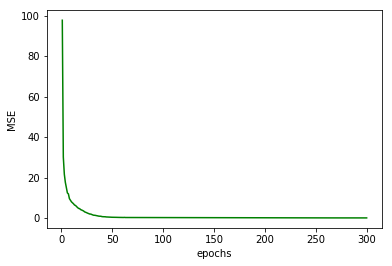

In [4]:
plt.gcf().clear() #limpia lo dibujado previamente en pl
plt.plot(range(301)[1:],listaloss,'g',label='loss')
plt.ylabel('MSE')
plt.xlabel('epochs')
plt.show()

Dado el learning rate igual a 0.01 y 300 epochs de entrenamiento podemos ver como se compoarta el error cuadrático conforme va aumentando el número de epochs de entrenamiento, donde se puede ver claramente un decrecimento inicial muy marcado y luego se va rapidamente a números cercanos a cero, pero para ver mejor el comportamiento luego de decrecimiento radical, haremos un zoom en el eje "y"(error cuadrático)

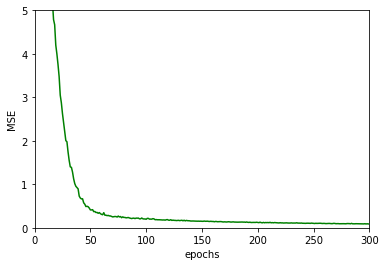

In [5]:
plt.gcf().clear() #limpia lo dibujado previamente en pl
plt.plot(range(301)[1:],listaloss,'g',label='loss')
plt.ylabel('MSE')
plt.xlabel('epochs')
plt.axis([0,300,0,5])
plt.show()

luego de plicar el zoom podemos ver que el comportamiento es muy parecido, lo que quiere decir que sin duda mantiene un decrecimiento exponencial, y que rapidamente llegamos al cero asintoticamente.

## (d) repetir (c) pero con relu

In [6]:
model = Sequential()
model.add(Dense(200, input_dim=X_train_scaled.shape[1], init='uniform'))
model.add(Activation('relu'))

model.add(Dense(1, init='uniform'))
model.add(Activation('linear'))

sgd = SGD(lr=0.01)
model.compile(optimizer=sgd,loss='mean_squared_error')

hist = model.fit(X_train_scaled.as_matrix(), y_train.as_matrix(), nb_epoch=300,
verbose=1, validation_data=(X_test_scaled.as_matrix(), y_test.as_matrix()))


listaloss2 = []
                
for i in range(300):
    listaloss2.append(hist.history['loss'][i])




/home/felipe/.local/lib/python2.7/site-packages/ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(200, kernel_initializer="uniform", input_dim=14)`
  
/home/felipe/.local/lib/python2.7/site-packages/ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, kernel_initializer="uniform")`
  """


Train on 379 samples, validate on 127 samples
Epoch 1/300
379/379 [==============================] - 0s - loss: 266.9614 - val_loss: 29.4009
Epoch 2/300
379/379 [==============================] - 0s - loss: 15.0745 - val_loss: 11.0551
Epoch 3/300
379/379 [==============================] - 0s - loss: 5.6603 - val_loss: 6.3493
Epoch 4/300
379/379 [==============================] - 0s - loss: 3.3663 - val_loss: 4.1477
Epoch 5/300
379/379 [==============================] - 0s - loss: 2.4374 - val_loss: 2.4665
Epoch 6/300
379/379 [==============================] - 0s - loss: 1.6843 - val_loss: 2.6810
Epoch 7/300
379/379 [==============================] - 0s - loss: 1.8687 - val_loss: 4.1245
Epoch 8/300
379/379 [==============================] - 0s - loss: 1.5852 - val_loss: 1.4435
Epoch 9/300
379/379 [==============================] - 0s - loss: 0.9315 - val_loss: 1.5199
Epoch 10/300
379/379 [==============================] - 0s - loss: 0.7481 - val_loss: 1.1136
Epoch 11/300
379/379 [======

379/379 [==============================] - 0s - loss: 0.0427 - val_loss: 0.2862
Epoch 89/300
379/379 [==============================] - 0s - loss: 0.0703 - val_loss: 0.5909
Epoch 90/300
379/379 [==============================] - 0s - loss: 0.0903 - val_loss: 0.3914
Epoch 91/300
379/379 [==============================] - 0s - loss: 0.0540 - val_loss: 0.1643
Epoch 92/300
379/379 [==============================] - 0s - loss: 0.0465 - val_loss: 0.2698
Epoch 93/300
379/379 [==============================] - 0s - loss: 0.0301 - val_loss: 0.2576
Epoch 94/300
379/379 [==============================] - 0s - loss: 0.0526 - val_loss: 0.2274
Epoch 95/300
379/379 [==============================] - 0s - loss: 0.0595 - val_loss: 0.2391
Epoch 96/300
379/379 [==============================] - 0s - loss: 0.0416 - val_loss: 0.3983
Epoch 97/300
379/379 [==============================] - 0s - loss: 0.1225 - val_loss: 0.2137
Epoch 98/300
379/379 [==============================] - 0s - loss: 0.0326 - val_los

379/379 [==============================] - 0s - loss: 0.0211 - val_loss: 0.2087
Epoch 176/300
379/379 [==============================] - 0s - loss: 0.0146 - val_loss: 0.2298
Epoch 177/300
379/379 [==============================] - 0s - loss: 0.0110 - val_loss: 0.1724
Epoch 178/300
379/379 [==============================] - 0s - loss: 0.0150 - val_loss: 0.2173
Epoch 179/300
379/379 [==============================] - 0s - loss: 0.0264 - val_loss: 0.2059
Epoch 180/300
379/379 [==============================] - 0s - loss: 0.0168 - val_loss: 0.1968
Epoch 181/300
379/379 [==============================] - 0s - loss: 0.0104 - val_loss: 0.2500
Epoch 182/300
379/379 [==============================] - 0s - loss: 0.0306 - val_loss: 0.2196
Epoch 183/300
379/379 [==============================] - 0s - loss: 0.0169 - val_loss: 0.2724
Epoch 184/300
379/379 [==============================] - 0s - loss: 0.0115 - val_loss: 0.2400
Epoch 185/300
379/379 [==============================] - 0s - loss: 0.0157

379/379 [==============================] - 0s - loss: 0.0111 - val_loss: 0.2574
Epoch 262/300
379/379 [==============================] - 0s - loss: 0.0148 - val_loss: 0.1676
Epoch 263/300
379/379 [==============================] - 0s - loss: 0.0111 - val_loss: 0.2064
Epoch 264/300
379/379 [==============================] - 0s - loss: 0.0066 - val_loss: 0.2311
Epoch 265/300
379/379 [==============================] - 0s - loss: 0.0117 - val_loss: 0.2787
Epoch 266/300
379/379 [==============================] - 0s - loss: 0.0111 - val_loss: 0.1938
Epoch 267/300
379/379 [==============================] - 0s - loss: 0.0136 - val_loss: 0.2938
Epoch 268/300
379/379 [==============================] - 0s - loss: 0.0118 - val_loss: 0.1773
Epoch 269/300
379/379 [==============================] - 0s - loss: 0.0184 - val_loss: 0.2002
Epoch 270/300
379/379 [==============================] - 0s - loss: 0.0165 - val_loss: 0.2016
Epoch 271/300
379/379 [==============================] - 0s - loss: 0.0091

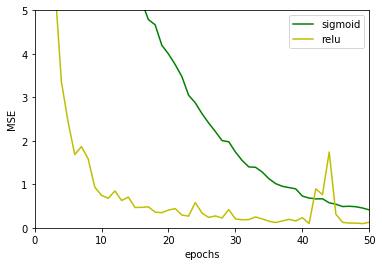

In [7]:
plt.plot(range(301)[1:],listaloss,'g',label='sigmoid')
plt.plot(range(301)[1:],listaloss2,'y',label='relu')
plt.ylabel('MSE')
plt.xlabel('epochs')
plt.legend(loc='upper right')
plt.axis([0,300,0,100])
plt.show()

al comparar relu y sigmoid podemos ver un comportamiento muy semejante por lo que nos vamos a acercar a la sección en que la curva tiene un mayor cambio es decir la parte en que cambia radicalmente.

In [ ]:
plt.plot(range(301)[1:],listaloss,'g',label='sigmoid')
plt.plot(range(301)[1:],listaloss2,'y',label='relu')
plt.ylabel('MSE')
plt.xlabel('epochs')
plt.legend(loc='upper right')
plt.axis([0,50,0,5])
plt.show()

en esta sección de la curva podemos notar una gran diferencia en como se acercan las cos curvas al cero, donde relu se acerca radicalmente mas rapido al cero, pero este tiene un ruido mayor, que en determinado momento es muy notable donde supera al error cuadrático

## (e) repetir (c) y (d) variando tasa de aprendizaje

/home/felipe/.local/lib/python2.7/site-packages/ipykernel_launcher.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(200, kernel_initializer="uniform", input_dim=14)`
  # Remove the CWD from sys.path while we load stuff.
/home/felipe/.local/lib/python2.7/site-packages/ipykernel_launcher.py:13: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, kernel_initializer="uniform")`
  del sys.path[0]


Train on 379 samples, validate on 127 samples
Epoch 1/300
379/379 [==============================] - 0s - loss: 595.3447 - val_loss: 578.2108
Epoch 2/300
379/379 [==============================] - 0s - loss: 595.3447 - val_loss: 578.2108
Epoch 3/300
379/379 [==============================] - 0s - loss: 595.3447 - val_loss: 578.2108
Epoch 4/300
379/379 [==============================] - 0s - loss: 595.3447 - val_loss: 578.2108
Epoch 5/300
379/379 [==============================] - 0s - loss: 595.3447 - val_loss: 578.2108
Epoch 6/300
379/379 [==============================] - 0s - loss: 595.3447 - val_loss: 578.2108
Epoch 7/300
379/379 [==============================] - 0s - loss: 595.3447 - val_loss: 578.2108
Epoch 8/300
379/379 [==============================] - 0s - loss: 595.3447 - val_loss: 578.2108
Epoch 9/300
379/379 [==============================] - 0s - loss: 595.3447 - val_loss: 578.2108
Epoch 10/300
379/379 [==============================] - 0s - loss: 595.3447 - val_loss: 57

379/379 [==============================] - 0s - loss: 595.3447 - val_loss: 578.2108
Epoch 85/300
379/379 [==============================] - 0s - loss: 595.3447 - val_loss: 578.2108
Epoch 86/300
379/379 [==============================] - 0s - loss: 595.3447 - val_loss: 578.2108
Epoch 87/300
379/379 [==============================] - 0s - loss: 595.3447 - val_loss: 578.2108
Epoch 88/300
379/379 [==============================] - 0s - loss: 595.3447 - val_loss: 578.2108
Epoch 89/300
379/379 [==============================] - 0s - loss: 595.3447 - val_loss: 578.2108
Epoch 90/300
379/379 [==============================] - 0s - loss: 595.3447 - val_loss: 578.2108
Epoch 91/300
379/379 [==============================] - 0s - loss: 595.3447 - val_loss: 578.2108
Epoch 92/300
379/379 [==============================] - 0s - loss: 595.3447 - val_loss: 578.2108
Epoch 93/300
379/379 [==============================] - 0s - loss: 595.3447 - val_loss: 578.2108
Epoch 94/300
379/379 [=====================

379/379 [==============================] - 0s - loss: 595.3447 - val_loss: 578.2108
Epoch 168/300
379/379 [==============================] - 0s - loss: 595.3447 - val_loss: 578.2108
Epoch 169/300
379/379 [==============================] - 0s - loss: 595.3447 - val_loss: 578.2108
Epoch 170/300
379/379 [==============================] - ETA: 0s - loss: 533.926 - 0s - loss: 595.3447 - val_loss: 578.2108
Epoch 171/300
379/379 [==============================] - 0s - loss: 595.3447 - val_loss: 578.2108
Epoch 172/300
379/379 [==============================] - 0s - loss: 595.3447 - val_loss: 578.2108
Epoch 173/300
379/379 [==============================] - 0s - loss: 595.3447 - val_loss: 578.2108
Epoch 174/300
379/379 [==============================] - 0s - loss: 595.3447 - val_loss: 578.2108
Epoch 175/300
379/379 [==============================] - 0s - loss: 595.3447 - val_loss: 578.2108
Epoch 176/300
379/379 [==============================] - 0s - loss: 595.3447 - val_loss: 578.2108
Epoch 17

379/379 [==============================] - 0s - loss: 595.3447 - val_loss: 578.2108
Epoch 250/300
379/379 [==============================] - 0s - loss: 595.3447 - val_loss: 578.2108
Epoch 251/300
379/379 [==============================] - 0s - loss: 595.3447 - val_loss: 578.2108
Epoch 252/300
379/379 [==============================] - 0s - loss: 595.3447 - val_loss: 578.2108
Epoch 253/300
379/379 [==============================] - 0s - loss: 595.3447 - val_loss: 578.2108
Epoch 254/300
379/379 [==============================] - 0s - loss: 595.3447 - val_loss: 578.2108
Epoch 255/300
379/379 [==============================] - 0s - loss: 595.3447 - val_loss: 578.2108
Epoch 256/300
379/379 [==============================] - 0s - loss: 595.3447 - val_loss: 578.2108
Epoch 257/300
379/379 [==============================] - 0s - loss: 595.3447 - val_loss: 578.2108
Epoch 258/300
379/379 [==============================] - 0s - loss: 595.3447 - val_loss: 578.2108
Epoch 259/300
379/379 [===========

/home/felipe/.local/lib/python2.7/site-packages/ipykernel_launcher.py:32: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(200, kernel_initializer="uniform", input_dim=14)`
/home/felipe/.local/lib/python2.7/site-packages/ipykernel_launcher.py:35: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, kernel_initializer="uniform")`


Train on 379 samples, validate on 127 samples
Epoch 1/300
379/379 [==============================] - 0s - loss: 594.8972 - val_loss: 577.8356
Epoch 2/300
379/379 [==============================] - 0s - loss: 594.8972 - val_loss: 577.8356
Epoch 3/300
379/379 [==============================] - 0s - loss: 594.8972 - val_loss: 577.8356
Epoch 4/300
379/379 [==============================] - 0s - loss: 594.8972 - val_loss: 577.8356
Epoch 5/300
379/379 [==============================] - 0s - loss: 594.8972 - val_loss: 577.8356
Epoch 6/300
379/379 [==============================] - 0s - loss: 594.8972 - val_loss: 577.8356
Epoch 7/300
379/379 [==============================] - 0s - loss: 594.8972 - val_loss: 577.8356
Epoch 8/300
379/379 [==============================] - 0s - loss: 594.8972 - val_loss: 577.8356
Epoch 9/300
379/379 [==============================] - 0s - loss: 594.8972 - val_loss: 577.8356
Epoch 10/300
379/379 [==============================] - 0s - loss: 594.8972 - val_loss: 57

379/379 [==============================] - ETA: 0s - loss: 543.298 - 0s - loss: 594.8972 - val_loss: 577.8356
Epoch 85/300
379/379 [==============================] - 0s - loss: 594.8972 - val_loss: 577.8356
Epoch 86/300
379/379 [==============================] - 0s - loss: 594.8972 - val_loss: 577.8356
Epoch 87/300
379/379 [==============================] - 0s - loss: 594.8972 - val_loss: 577.8356
Epoch 88/300
379/379 [==============================] - 0s - loss: 594.8972 - val_loss: 577.8356
Epoch 89/300
379/379 [==============================] - 0s - loss: 594.8972 - val_loss: 577.8356
Epoch 90/300
379/379 [==============================] - 0s - loss: 594.8972 - val_loss: 577.8356
Epoch 91/300
379/379 [==============================] - 0s - loss: 594.8972 - val_loss: 577.8356
Epoch 92/300
379/379 [==============================] - 0s - loss: 594.8972 - val_loss: 577.8356
Epoch 93/300
379/379 [==============================] - 0s - loss: 594.8972 - val_loss: 577.8356
Epoch 94/300
379/

379/379 [==============================] - 0s - loss: 594.8972 - val_loss: 577.8356
Epoch 167/300
379/379 [==============================] - 0s - loss: 594.8972 - val_loss: 577.8356
Epoch 168/300
379/379 [==============================] - 0s - loss: 594.8972 - val_loss: 577.8356
Epoch 169/300
379/379 [==============================] - 0s - loss: 594.8972 - val_loss: 577.8356
Epoch 170/300
379/379 [==============================] - 0s - loss: 594.8972 - val_loss: 577.8356
Epoch 171/300
379/379 [==============================] - 0s - loss: 594.8972 - val_loss: 577.8356
Epoch 172/300
379/379 [==============================] - 0s - loss: 594.8972 - val_loss: 577.8356
Epoch 173/300
379/379 [==============================] - 0s - loss: 594.8972 - val_loss: 577.8356
Epoch 174/300
379/379 [==============================] - 0s - loss: 594.8972 - val_loss: 577.8356
Epoch 175/300
379/379 [==============================] - 0s - loss: 594.8972 - val_loss: 577.8356
Epoch 176/300
379/379 [===========

379/379 [==============================] - 0s - loss: 594.8972 - val_loss: 577.8356
Epoch 250/300
379/379 [==============================] - 0s - loss: 594.8972 - val_loss: 577.8356
Epoch 251/300
379/379 [==============================] - 0s - loss: 594.8972 - val_loss: 577.8356
Epoch 252/300
379/379 [==============================] - 0s - loss: 594.8972 - val_loss: 577.8356
Epoch 253/300
379/379 [==============================] - 0s - loss: 594.8972 - val_loss: 577.8356
Epoch 254/300
379/379 [==============================] - 0s - loss: 594.8972 - val_loss: 577.8356
Epoch 255/300
379/379 [==============================] - ETA: 0s - loss: 435.130 - 0s - loss: 594.8972 - val_loss: 577.8356
Epoch 256/300
379/379 [==============================] - 0s - loss: 594.8972 - val_loss: 577.8356
Epoch 257/300
379/379 [==============================] - 0s - loss: 594.8972 - val_loss: 577.8356
Epoch 258/300
379/379 [==============================] - ETA: 0s - loss: 601.273 - 0s - loss: 594.8972 - v

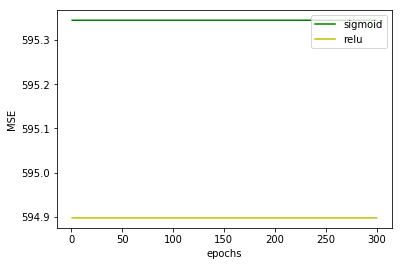

Train on 379 samples, validate on 127 samples
Epoch 1/300
379/379 [==============================] - 0s - loss: 3491409686338459.0000 - val_loss: 1293299826017679104.0000
Epoch 2/300
379/379 [==============================] - 0s - loss: 1462428797792482388796290105344.0000 - val_loss: 235229196441878590824256165117952.0000
Epoch 3/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan                        
Epoch 4/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 5/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 6/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 7/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 8/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 9/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 10/300
379/379 [===========================

379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 94/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 95/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 96/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 97/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 98/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 99/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 100/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 101/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 102/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 103/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 104/300
379/379 [=============================

379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 186/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 187/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 188/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 189/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 190/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 191/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 192/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 193/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 194/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 195/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 196/300
379/379 [=======================

379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 279/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 280/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 281/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 282/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 283/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 284/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 285/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 286/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 287/300
379/379 [==============================] - ETA: 0s - loss: n - 0s - loss: nan - val_loss: nan
Epoch 288/300
379/379 [==============================] - ETA: 0s - loss: n - 0s - loss: nan - val_loss: nan
Epoch 

379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 71/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 72/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 73/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 74/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 75/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 76/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 77/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 78/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 79/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 80/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 81/300
379/379 [==============================] - 

379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 164/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 165/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 166/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 167/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 168/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 169/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 170/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 171/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 172/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 173/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 174/300
379/379 [=======================

379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 256/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 257/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 258/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 259/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 260/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 261/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 262/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 263/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 264/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 265/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 266/300
379/379 [=======================

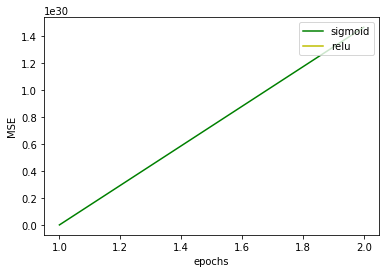

Train on 379 samples, validate on 127 samples
Epoch 1/300
379/379 [==============================] - 0s - loss: 214403679367347300204544.0000 - val_loss: 386293166553584300055330816.0000
Epoch 2/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan                  
Epoch 3/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 4/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 5/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 6/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 7/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 8/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 9/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 10/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 11/300
379/379

379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 94/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 95/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 96/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 97/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 98/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 99/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 100/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 101/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 102/300
379/379 [==============================] - ETA: 0s - loss: n - 0s - loss: nan - val_loss: nan
Epoch 103/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 104/300
379/379 [=========

379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 187/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 188/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 189/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 190/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 191/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 192/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 193/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 194/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 195/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 196/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 197/300
379/379 [=======================

379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 279/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 280/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 281/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 282/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 283/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 284/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 285/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 286/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 287/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 288/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 289/300
379/379 [=======================

379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 72/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 73/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 74/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 75/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 76/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 77/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 78/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 79/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 80/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 81/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 82/300
379/379 [==============================] - 

379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 165/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 166/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 167/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 168/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 169/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 170/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 171/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 172/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 173/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 174/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 175/300
379/379 [=======================

379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 257/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 258/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 259/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 260/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 261/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 262/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 263/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 264/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 265/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 266/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 267/300
379/379 [=======================

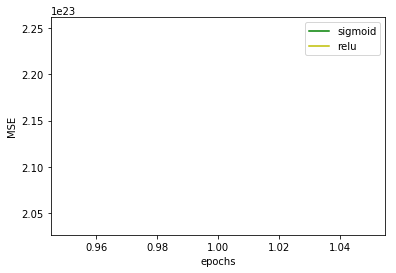

Train on 379 samples, validate on 127 samples
Epoch 1/300
379/379 [==============================] - 0s - loss: 495694521754751014493224960.0000 - val_loss: 2289633352324518895153305354240.0000
Epoch 2/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan                      
Epoch 3/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 4/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 5/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 6/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 7/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 8/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 9/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 10/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 11/

379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 94/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 95/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 96/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 97/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 98/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 99/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 100/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 101/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 102/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 103/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 104/300
379/379 [=============================

379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 187/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 188/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 189/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 190/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 191/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 192/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 193/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 194/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 195/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 196/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 197/300
379/379 [=======================

379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 280/300
379/379 [==============================] - ETA: 0s - loss: n - 0s - loss: nan - val_loss: nan
Epoch 281/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 282/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 283/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 284/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 285/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 286/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 287/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 288/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 289/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 290/300
379/379 [===

379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 73/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 74/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 75/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 76/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 77/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 78/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 79/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 80/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 81/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 82/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 83/300
379/379 [==============================] - 

379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 166/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 167/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 168/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 169/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 170/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 171/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 172/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 173/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 174/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 175/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 176/300
379/379 [=======================

379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 259/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 260/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 261/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 262/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 263/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 264/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 265/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 266/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 267/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 268/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 269/300
379/379 [=======================

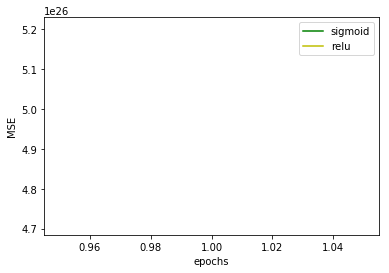

Train on 379 samples, validate on 127 samples
Epoch 1/300
379/379 [==============================] - 0s - loss: 2179942190984919345412851105792.0000 - val_loss: 28534262110075171685256177387569152.0000
Epoch 2/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan                          
Epoch 3/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 4/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 5/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 6/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 7/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 8/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 9/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 10/300
379/379 [==============================] - 0s - loss: nan - val_loss: n

379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 94/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 95/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 96/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 97/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 98/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 99/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 100/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 101/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 102/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 103/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 104/300
379/379 [=============================

379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 187/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 188/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 189/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 190/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 191/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 192/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 193/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 194/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 195/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 196/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 197/300
379/379 [=======================

379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 280/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 281/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 282/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 283/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 284/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 285/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 286/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 287/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 288/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 289/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 290/300
379/379 [=======================

379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 73/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 74/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 75/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 76/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 77/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 78/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 79/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 80/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 81/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 82/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 83/300
379/379 [==============================] - 

379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 166/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 167/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 168/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 169/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 170/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 171/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 172/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 173/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 174/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 175/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 176/300
379/379 [=======================

379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 259/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 260/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 261/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 262/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 263/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 264/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 265/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 266/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 267/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 268/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 269/300
379/379 [=======================

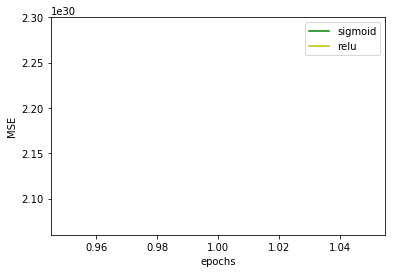

Train on 379 samples, validate on 127 samples
Epoch 1/300
379/379 [==============================] - 0s - loss: 1894275025782411064707825962844160.0000 - val_loss: inf
Epoch 2/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 3/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 4/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 5/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 6/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 7/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 8/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 9/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 10/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 11/300
379/379 [==============================] - 0

379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 94/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 95/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 96/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 97/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 98/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 99/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 100/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 101/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 102/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 103/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 104/300
379/379 [=============================

379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 187/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 188/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 189/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 190/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 191/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 192/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 193/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 194/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 195/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 196/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 197/300
379/379 [=======================

379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 280/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 281/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 282/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 283/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 284/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 285/300
379/379 [==============================] - ETA: 0s - loss: n - 0s - loss: nan - val_loss: nan
Epoch 286/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 287/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 288/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 289/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 290/300
379/379 [===

379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 72/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 73/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 74/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 75/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 76/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 77/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 78/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 79/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 80/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 81/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 82/300
379/379 [==============================] - 

379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 165/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 166/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 167/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 168/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 169/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 170/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 171/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 172/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 173/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 174/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 175/300
379/379 [=======================

379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 257/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 258/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 259/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 260/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 261/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 262/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 263/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 264/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 265/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 266/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 267/300
379/379 [=======================

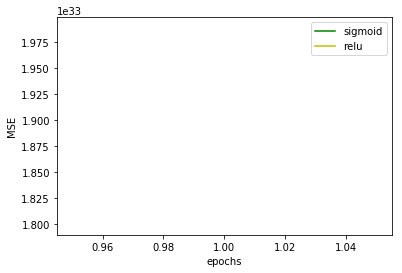

Train on 379 samples, validate on 127 samples
Epoch 1/300
379/379 [==============================] - 0s - loss: 624867739238051128987038515200.0000 - val_loss: 19219511771050927036601014012608512.0000
Epoch 2/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan                          
Epoch 3/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 4/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 5/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 6/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 7/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 8/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 9/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 10/300
379/379 [==============================] - 0s - loss: nan - val_loss: na

379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 94/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 95/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 96/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 97/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 98/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 99/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 100/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 101/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 102/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 103/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 104/300
379/379 [=============================

379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 186/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 187/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 188/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 189/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 190/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 191/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 192/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 193/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 194/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 195/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 196/300
379/379 [=======================

379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 279/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 280/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 281/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 282/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 283/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 284/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 285/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 286/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 287/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 288/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 289/300
379/379 [=======================

379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 72/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 73/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 74/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 75/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 76/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 77/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 78/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 79/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 80/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 81/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 82/300
379/379 [==============================] - 

379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 165/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 166/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 167/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 168/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 169/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 170/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 171/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 172/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 173/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 174/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 175/300
379/379 [=======================

379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 258/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 259/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 260/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 261/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 262/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 263/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 264/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 265/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 266/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 267/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 268/300
379/379 [=======================

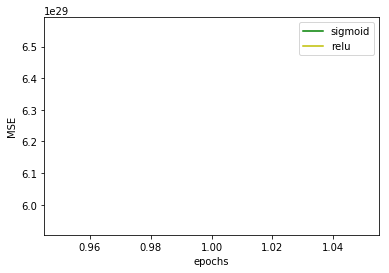

Train on 379 samples, validate on 127 samples
Epoch 1/300
379/379 [==============================] - 0s - loss: 337871515170496533918325407744.0000 - val_loss: 4661379128171352381023466328948736.0000
Epoch 2/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan                         
Epoch 3/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 4/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 5/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 6/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 7/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 8/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 9/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 10/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan


379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 94/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 95/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 96/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 97/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 98/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 99/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 100/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 101/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 102/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 103/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 104/300
379/379 [=============================

379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 187/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 188/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 189/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 190/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 191/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 192/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 193/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 194/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 195/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 196/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 197/300
379/379 [=======================

379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 279/300
379/379 [==============================] - ETA: 0s - loss: n - 0s - loss: nan - val_loss: nan
Epoch 280/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 281/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 282/300
379/379 [==============================] - ETA: 0s - loss: n - 0s - loss: nan - val_loss: nan
Epoch 283/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 284/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 285/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 286/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 287/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 288/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 

379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 71/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 72/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 73/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 74/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 75/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 76/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 77/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 78/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 79/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 80/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 81/300
379/379 [==============================] - 

379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 164/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 165/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 166/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 167/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 168/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 169/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 170/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 171/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 172/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 173/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 174/300
379/379 [=======================

379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 256/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 257/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 258/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 259/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 260/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 261/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 262/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 263/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 264/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 265/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 266/300
379/379 [=======================

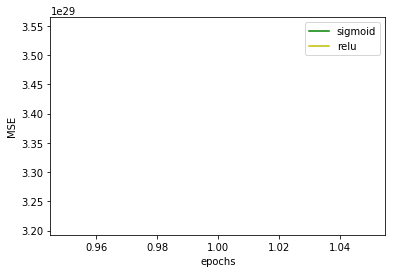

Train on 379 samples, validate on 127 samples
Epoch 1/300
379/379 [==============================] - 0s - loss: inf - val_loss: inf
Epoch 2/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 3/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 4/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 5/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 6/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 7/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 8/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 9/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 10/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 11/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 

379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 95/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 96/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 97/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 98/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 99/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 100/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 101/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 102/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 103/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 104/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 105/300
379/379 [============================

379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 188/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 189/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 190/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 191/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 192/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 193/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 194/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 195/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 196/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 197/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 198/300
379/379 [=======================

379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 281/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 282/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 283/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 284/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 285/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 286/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 287/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 288/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 289/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 290/300
379/379 [==============================] - ETA: 0s - loss: n - 0s - loss: nan - val_loss: nan
Epoch 291/300
379/379 [===

379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 74/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 75/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 76/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 77/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 78/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 79/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 80/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 81/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 82/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 83/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 84/300
379/379 [==============================] - 

379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 167/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 168/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 169/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 170/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 171/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 172/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 173/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 174/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 175/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 176/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 177/300
379/379 [=======================

379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 260/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 261/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 262/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 263/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 264/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 265/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 266/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 267/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 268/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 269/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 270/300
379/379 [=======================

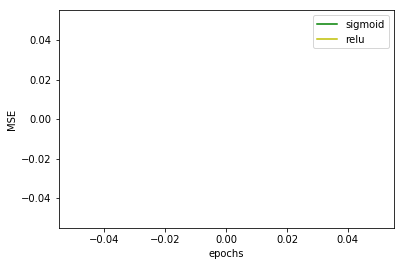

Train on 379 samples, validate on 127 samples
Epoch 1/300
379/379 [==============================] - 0s - loss: 134656926197656598368466826707337216.0000 - val_loss: inf
Epoch 2/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 3/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 4/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 5/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 6/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 7/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 8/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 9/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 10/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 11/300
379/379 [==============================] -

379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 94/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 95/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 96/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 97/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 98/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 99/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 100/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 101/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 102/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 103/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 104/300
379/379 [=============================

379/379 [==============================] - ETA: 0s - loss: n - 0s - loss: nan - val_loss: nan
Epoch 186/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 187/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 188/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 189/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 190/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 191/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 192/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 193/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 194/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 195/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 196/300
379/379 [===

379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 278/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 279/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 280/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 281/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 282/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 283/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 284/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 285/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 286/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 287/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 288/300
379/379 [=======================

379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 71/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 72/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 73/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 74/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 75/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 76/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 77/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 78/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 79/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 80/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 81/300
379/379 [==============================] - 

379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 164/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 165/300
379/379 [==============================] - ETA: 0s - loss: n - 0s - loss: nan - val_loss: nan
Epoch 166/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 167/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 168/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 169/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 170/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 171/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 172/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 173/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 174/300
379/379 [===

379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 257/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 258/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 259/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 260/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 261/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 262/300
379/379 [==============================] - ETA: 0s - loss: n - 0s - loss: nan - val_loss: nan
Epoch 263/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 264/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 265/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 266/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 267/300
379/379 [===

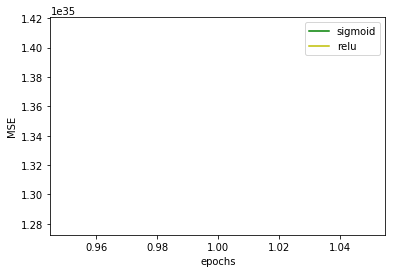

Train on 379 samples, validate on 127 samples
Epoch 1/300
379/379 [==============================] - 0s - loss: 252844.5056 - val_loss: 82.1306
Epoch 2/300
379/379 [==============================] - 0s - loss: 90.7843 - val_loss: 83.1769
Epoch 3/300
379/379 [==============================] - 0s - loss: 86.6400 - val_loss: 82.6462
Epoch 4/300
379/379 [==============================] - 0s - loss: 85.4743 - val_loss: 81.8795
Epoch 5/300
379/379 [==============================] - 0s - loss: 87.0358 - val_loss: 93.0643
Epoch 6/300
379/379 [==============================] - 0s - loss: 92.1254 - val_loss: 82.8928
Epoch 7/300
379/379 [==============================] - 0s - loss: 89.9521 - val_loss: 81.6992
Epoch 8/300
379/379 [==============================] - 0s - loss: 86.5932 - val_loss: 86.0795
Epoch 9/300
379/379 [==============================] - 0s - loss: 88.0896 - val_loss: 83.2610
Epoch 10/300
379/379 [==============================] - 0s - loss: 87.4660 - val_loss: 81.7020
Epoch 11/

379/379 [==============================] - 0s - loss: 90.2864 - val_loss: 82.2758
Epoch 87/300
379/379 [==============================] - 0s - loss: 87.1903 - val_loss: 81.8189
Epoch 88/300
379/379 [==============================] - 0s - loss: 90.3050 - val_loss: 88.2486
Epoch 89/300
379/379 [==============================] - 0s - loss: 87.6309 - val_loss: 87.3468
Epoch 90/300
379/379 [==============================] - 0s - loss: 85.6367 - val_loss: 109.7972
Epoch 91/300
379/379 [==============================] - 0s - loss: 93.9761 - val_loss: 82.0278
Epoch 92/300
379/379 [==============================] - 0s - loss: 87.3397 - val_loss: 82.8441
Epoch 93/300
379/379 [==============================] - 0s - loss: 88.7006 - val_loss: 81.8714
Epoch 94/300
379/379 [==============================] - 0s - loss: 86.5273 - val_loss: 82.0065
Epoch 95/300
379/379 [==============================] - 0s - loss: 91.1950 - val_loss: 81.8879
Epoch 96/300
379/379 [==============================] - 0s - l

379/379 [==============================] - 0s - loss: 86.6373 - val_loss: 89.2222
Epoch 172/300
379/379 [==============================] - 0s - loss: 88.2217 - val_loss: 83.4500
Epoch 173/300
379/379 [==============================] - 0s - loss: 86.9824 - val_loss: 105.2182
Epoch 174/300
379/379 [==============================] - 0s - loss: 89.1006 - val_loss: 82.1364
Epoch 175/300
379/379 [==============================] - 0s - loss: 86.7084 - val_loss: 86.2447
Epoch 176/300
379/379 [==============================] - 0s - loss: 93.3141 - val_loss: 81.9229
Epoch 177/300
379/379 [==============================] - 0s - loss: 89.7236 - val_loss: 82.6173
Epoch 178/300
379/379 [==============================] - 0s - loss: 87.8293 - val_loss: 89.6704
Epoch 179/300
379/379 [==============================] - 0s - loss: 88.9077 - val_loss: 93.6929
Epoch 180/300
379/379 [==============================] - 0s - loss: 89.2897 - val_loss: 85.0293
Epoch 181/300
379/379 [==============================

379/379 [==============================] - 0s - loss: 86.4755 - val_loss: 81.8524
Epoch 256/300
379/379 [==============================] - 0s - loss: 90.8387 - val_loss: 88.3128
Epoch 257/300
379/379 [==============================] - 0s - loss: 87.7023 - val_loss: 81.7557
Epoch 258/300
379/379 [==============================] - 0s - loss: 85.8889 - val_loss: 87.8386
Epoch 259/300
379/379 [==============================] - 0s - loss: 90.9308 - val_loss: 81.8646
Epoch 260/300
379/379 [==============================] - 0s - loss: 88.5597 - val_loss: 81.8286
Epoch 261/300
379/379 [==============================] - 0s - loss: 86.0868 - val_loss: 82.0405
Epoch 262/300
379/379 [==============================] - 0s - loss: 85.6339 - val_loss: 81.8226
Epoch 263/300
379/379 [==============================] - 0s - loss: 91.4880 - val_loss: 81.8955
Epoch 264/300
379/379 [==============================] - 0s - loss: 87.3797 - val_loss: 97.7425
Epoch 265/300
379/379 [==============================]

379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 44/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 45/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 46/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 47/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 48/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 49/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 50/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 51/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 52/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 53/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 54/300
379/379 [==============================] - 

379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 137/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 138/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 139/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 140/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 141/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 142/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 143/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 144/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 145/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 146/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 147/300
379/379 [=======================

379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 230/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 231/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 232/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 233/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 234/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 235/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 236/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 237/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 238/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 239/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 240/300
379/379 [=======================

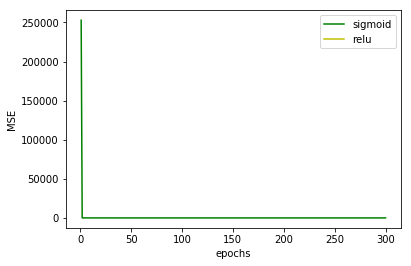

Train on 379 samples, validate on 127 samples
Epoch 1/300
379/379 [==============================] - 0s - loss: 2447358122662479739619100327936.0000 - val_loss: 32491395911511961274570587424948224.0000
Epoch 2/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan                          
Epoch 3/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 4/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 5/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 6/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 7/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 8/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 9/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 10/300
379/379 [==============================] - 0s - loss: nan - val_loss: n

379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 94/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 95/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 96/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 97/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 98/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 99/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 100/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 101/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 102/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 103/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 104/300
379/379 [=============================

379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 187/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 188/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 189/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 190/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 191/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 192/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 193/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 194/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 195/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 196/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 197/300
379/379 [=======================

379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 279/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 280/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 281/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 282/300
379/379 [==============================] - ETA: 0s - loss: n - 0s - loss: nan - val_loss: nan
Epoch 283/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 284/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 285/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 286/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 287/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 288/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 289/300
379/379 [===

379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 72/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 73/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 74/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 75/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 76/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 77/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 78/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 79/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 80/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 81/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 82/300
379/379 [==============================] - 

379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 165/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 166/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 167/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 168/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 169/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 170/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 171/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 172/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 173/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 174/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 175/300
379/379 [=======================

379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 258/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 259/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 260/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 261/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 262/300
379/379 [==============================] - ETA: 0s - loss: n - 0s - loss: nan - val_loss: nan
Epoch 263/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 264/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 265/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 266/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 267/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 268/300
379/379 [===

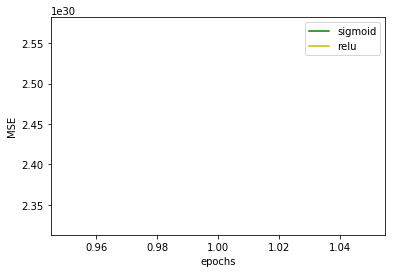

Train on 379 samples, validate on 127 samples
Epoch 1/300
379/379 [==============================] - 0s - loss: 2390922784741076992.0000 - val_loss: 1601657765642710810624.0000
Epoch 2/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan             
Epoch 3/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 4/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 5/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 6/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 7/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 8/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 9/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 10/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 11/300
379/379 [=============

379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 94/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 95/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 96/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 97/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 98/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 99/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 100/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 101/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 102/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 103/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 104/300
379/379 [=============================

379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 186/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 187/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 188/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 189/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 190/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 191/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 192/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 193/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 194/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 195/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 196/300
379/379 [=======================

379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 279/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 280/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 281/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 282/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 283/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 284/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 285/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 286/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 287/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 288/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 289/300
379/379 [=======================

379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 72/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 73/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 74/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 75/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 76/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 77/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 78/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 79/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 80/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 81/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 82/300
379/379 [==============================] - 

379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 164/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 165/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 166/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 167/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 168/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 169/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 170/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 171/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 172/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 173/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 174/300
379/379 [=======================

379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 256/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 257/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 258/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 259/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 260/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 261/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 262/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 263/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 264/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 265/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 266/300
379/379 [=======================

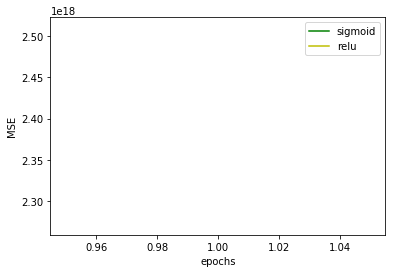

Train on 379 samples, validate on 127 samples
Epoch 1/300
379/379 [==============================] - 0s - loss: 49412956563924244406206464.0000 - val_loss: 168149198050485293200198074368.0000
Epoch 2/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan                     
Epoch 3/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 4/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 5/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 6/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 7/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 8/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 9/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 10/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 11/300

379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 94/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 95/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 96/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 97/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 98/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 99/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 100/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 101/300
379/379 [==============================] - ETA: 0s - loss: n - 0s - loss: nan - val_loss: nan
Epoch 102/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 103/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 104/300
379/379 [=========

379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 187/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 188/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 189/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 190/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 191/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 192/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 193/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 194/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 195/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 196/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 197/300
379/379 [=======================

379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 280/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 281/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 282/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 283/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 284/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 285/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 286/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 287/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 288/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 289/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 290/300
379/379 [=======================

379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 73/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 74/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 75/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 76/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 77/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 78/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 79/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 80/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 81/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 82/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 83/300
379/379 [==============================] - 

379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 166/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 167/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 168/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 169/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 170/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 171/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 172/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 173/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 174/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 175/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 176/300
379/379 [=======================

379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 258/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 259/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 260/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 261/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 262/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 263/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 264/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 265/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 266/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 267/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 268/300
379/379 [=======================

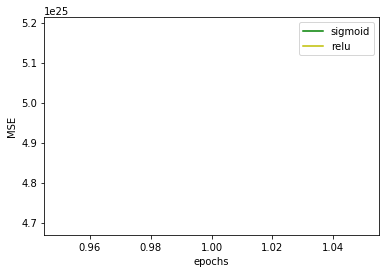

Train on 379 samples, validate on 127 samples
Epoch 1/300
379/379 [==============================] - 0s - loss: 6176799931353010630795949244416.0000 - val_loss: 24050408313540525838465456941301760.0000
Epoch 2/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan                          
Epoch 3/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 4/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 5/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 6/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 7/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 8/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 9/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 10/300
379/379 [==============================] - 0s - loss: nan - val_loss: n

379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 93/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 94/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 95/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 96/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 97/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 98/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 99/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 100/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 101/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 102/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 103/300
379/379 [==============================

379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 186/300
379/379 [==============================] - ETA: 0s - loss: n - 0s - loss: nan - val_loss: nan
Epoch 187/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 188/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 189/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 190/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 191/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 192/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 193/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 194/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 195/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 196/300
379/379 [===

379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 278/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 279/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 280/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 281/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 282/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 283/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 284/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 285/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 286/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 287/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 288/300
379/379 [=======================

379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 71/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 72/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 73/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 74/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 75/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 76/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 77/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 78/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 79/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 80/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 81/300
379/379 [==============================] - 

379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 164/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 165/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 166/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 167/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 168/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 169/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 170/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 171/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 172/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 173/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 174/300
379/379 [=======================

379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 257/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 258/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 259/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 260/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 261/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 262/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 263/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 264/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 265/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 266/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 267/300
379/379 [=======================

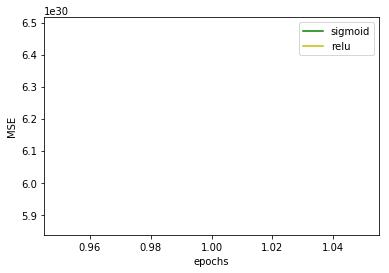

Train on 379 samples, validate on 127 samples
Epoch 1/300
379/379 [==============================] - 0s - loss: 5003157850714522215161790464.0000 - val_loss: 51325145687088065186370288615424.0000
Epoch 2/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan                       
Epoch 3/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 4/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 5/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 6/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 7/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 8/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 9/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 10/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 

379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 94/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 95/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 96/300
379/379 [==============================] - ETA: 0s - loss: n - 0s - loss: nan - val_loss: nan
Epoch 97/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 98/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 99/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 100/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 101/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 102/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 103/300
379/379 [==============================] - ETA: 0s - loss: n - 0s - loss: nan - val_loss: nan
Epoch 104/30

379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 186/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 187/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 188/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 189/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 190/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 191/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 192/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 193/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 194/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 195/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 196/300
379/379 [=======================

379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 279/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 280/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 281/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 282/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 283/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 284/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 285/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 286/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 287/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 288/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 289/300
379/379 [=======================

379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 72/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 73/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 74/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 75/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 76/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 77/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 78/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 79/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 80/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 81/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 82/300
379/379 [==============================] - 

379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 165/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 166/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 167/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 168/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 169/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 170/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 171/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 172/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 173/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 174/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 175/300
379/379 [=======================

379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 257/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 258/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 259/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 260/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 261/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 262/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 263/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 264/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 265/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 266/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 267/300
379/379 [=======================

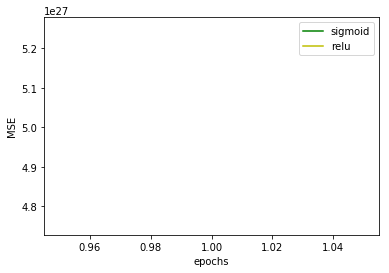

Train on 379 samples, validate on 127 samples
Epoch 1/300
379/379 [==============================] - 0s - loss: 28261876466687698779164813194952704.0000 - val_loss: inf
Epoch 2/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 3/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 4/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 5/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 6/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 7/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 8/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 9/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 10/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 11/300
379/379 [==============================] - 

379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 94/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 95/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 96/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 97/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 98/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 99/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 100/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 101/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 102/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 103/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 104/300
379/379 [=============================

379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 186/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 187/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 188/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 189/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 190/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 191/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 192/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 193/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 194/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 195/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 196/300
379/379 [=======================

379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 279/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 280/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 281/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 282/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 283/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 284/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 285/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 286/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 287/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 288/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 289/300
379/379 [=======================

379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 71/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 72/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 73/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 74/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 75/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 76/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 77/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 78/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 79/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 80/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 81/300
379/379 [==============================] - 

379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 164/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 165/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 166/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 167/300
379/379 [==============================] - ETA: 0s - loss: n - 0s - loss: nan - val_loss: nan
Epoch 168/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 169/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 170/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 171/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 172/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 173/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 174/300
379/379 [===

379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 256/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 257/300
379/379 [==============================] - ETA: 0s - loss: n - 0s - loss: nan - val_loss: nan
Epoch 258/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 259/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 260/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 261/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 262/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 263/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 264/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 265/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 266/300
379/379 [===

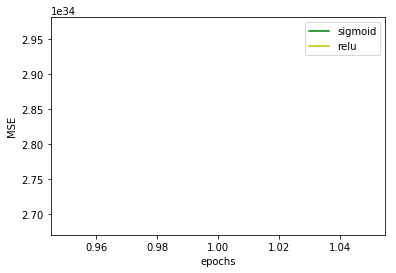

Train on 379 samples, validate on 127 samples
Epoch 1/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 2/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 3/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 4/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 5/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 6/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 7/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 8/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 9/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 10/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 11/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 

379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 95/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 96/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 97/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 98/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 99/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 100/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 101/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 102/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 103/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 104/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 105/300
379/379 [============================

379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 188/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 189/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 190/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 191/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 192/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 193/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 194/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 195/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 196/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 197/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 198/300
379/379 [=======================

379/379 [==============================] - ETA: 0s - loss: n - 0s - loss: nan - val_loss: nan
Epoch 280/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 281/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 282/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 283/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 284/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 285/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 286/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 287/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 288/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 289/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 290/300
379/379 [===

379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 72/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 73/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 74/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 75/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 76/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 77/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 78/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 79/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 80/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 81/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 82/300
379/379 [==============================] - 

379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 165/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 166/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 167/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 168/300
379/379 [==============================] - ETA: 0s - loss: n - 0s - loss: nan - val_loss: nan
Epoch 169/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 170/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 171/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 172/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 173/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 174/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 175/300
379/379 [===

379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 258/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 259/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 260/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 261/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 262/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 263/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 264/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 265/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 266/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 267/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 268/300
379/379 [=======================

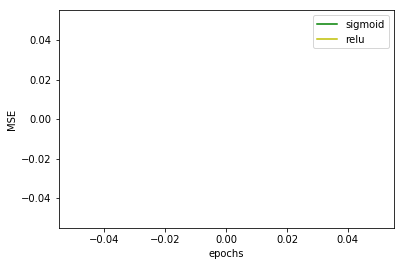

Train on 379 samples, validate on 127 samples
Epoch 1/300
379/379 [==============================] - 0s - loss: inf - val_loss: nan
Epoch 2/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 3/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 4/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 5/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 6/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 7/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 8/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 9/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 10/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 11/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 

379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 95/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 96/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 97/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 98/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 99/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 100/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 101/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 102/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 103/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 104/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 105/300
379/379 [============================

Epoch 187/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 188/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 189/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 190/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 191/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 192/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 193/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 194/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 195/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 196/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 197/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 198/300
379/379 [=========

379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 280/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 281/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 282/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 283/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 284/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 285/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 286/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 287/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 288/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 289/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 290/300
379/379 [=======================

379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 73/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 74/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 75/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 76/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 77/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 78/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 79/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 80/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 81/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 82/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 83/300
379/379 [==============================] - 

379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 166/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 167/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 168/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 169/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 170/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 171/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 172/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 173/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 174/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 175/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 176/300
379/379 [=======================

379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 258/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 259/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 260/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 261/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 262/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 263/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 264/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 265/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 266/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 267/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 268/300
379/379 [=======================

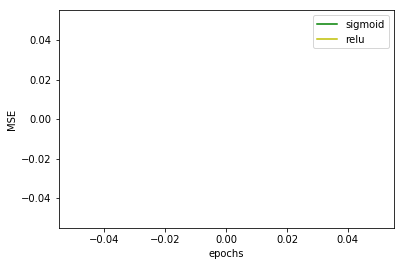

Train on 379 samples, validate on 127 samples
Epoch 1/300
379/379 [==============================] - 0s - loss: inf - val_loss: nan
Epoch 2/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 3/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 4/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 5/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 6/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 7/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 8/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 9/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 10/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 11/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 

379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 95/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 96/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 97/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 98/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 99/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 100/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 101/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 102/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 103/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 104/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 105/300
379/379 [============================

379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 188/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 189/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 190/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 191/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 192/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 193/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 194/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 195/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 196/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 197/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 198/300
379/379 [=======================

379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 281/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 282/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 283/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 284/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 285/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 286/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 287/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 288/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 289/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 290/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 291/300
379/379 [=======================

379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 74/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 75/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 76/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 77/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 78/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 79/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 80/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 81/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 82/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 83/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 84/300
379/379 [==============================] - 

379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 167/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 168/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 169/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 170/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 171/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 172/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 173/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 174/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 175/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 176/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 177/300
379/379 [=======================

379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 260/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 261/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 262/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 263/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 264/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 265/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 266/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 267/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 268/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 269/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 270/300
379/379 [=======================

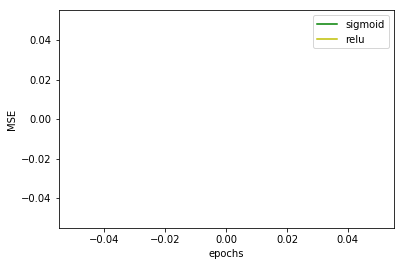

In [8]:
import numpy as np
n_lr = 20
lear_rate = np.linspace(0,1,n_lr)


for lr in lear_rate:
    
    #sigmoid
    model = Sequential()
    model.add(Dense(200, input_dim=X_train_scaled.shape[1], init='uniform'))
    model.add(Activation('sigmoid'))

    model.add(Dense(1, init='uniform'))
    model.add(Activation('linear'))

    sgd = SGD(lr=lr)
    model.compile(optimizer=sgd,loss='mean_squared_error')

    hist = model.fit(X_train_scaled.as_matrix(), y_train.as_matrix(), nb_epoch=300,
    verbose = 1, validation_data=(X_test_scaled.as_matrix(), y_test.as_matrix()))
    listaloss = []
                
    for i in range(300):
        listaloss.append(hist.history['loss'][i])

    
    
    
    
    #relu
    model = Sequential()
    model.add(Dense(200, input_dim=X_train_scaled.shape[1], init='uniform'))
    model.add(Activation('relu'))

    model.add(Dense(1, init='uniform'))
    model.add(Activation('linear'))

    sgd = SGD(lr=lr)
    model.compile(optimizer=sgd,loss='mean_squared_error')

    hist = model.fit(X_train_scaled.as_matrix(), y_train.as_matrix(), nb_epoch=300,
    verbose=1, validation_data=(X_test_scaled.as_matrix(), y_test.as_matrix()))


    listaloss2 = []
                
    for i in range(300):
        listaloss2.append(hist.history['loss'][i])

    plt.plot(range(301)[1:],listaloss,'g',label='sigmoid')
    plt.plot(range(301)[1:],listaloss2,'y',label='relu')
    plt.ylabel('MSE')
    plt.xlabel('epochs')
    plt.legend(loc='upper right')
    plt.show()




## (f)


In [9]:
from sklearn import cross_validation

#relu
Xm = X_train_scaled.as_matrix()
ym = y_train.as_matrix()
kfold = cross_validation.KFold(len(Xm), 10)
cvscores = []
for i, (train, val) in enumerate(kfold):
    # create model
    
    model = Sequential()

    model.add(Dense(200, input_dim=Xm.shape[1], init='uniform'))
    model.add(Activation('relu'))
    model.add(Dense(1, init='uniform'))
    model.add(Activation('linear'))
    # Compile model
    sgd = SGD(lr=0.2)
    model.compile(optimizer=sgd,loss='mean_squared_error')
    # Fit the model
    model.fit(Xm[train], ym[train], nb_epoch=300)
    # evaluate the model
    scores = model.evaluate(Xm[val], ym[val])
    cvscores.append(scores)
mse_cv = np.mean(cvscores)


#sigmoid
Xm = X_train_scaled.as_matrix()
ym = y_train.as_matrix()
kfold = cross_validation.KFold(len(Xm), 10)
cvscores = []
for i, (train, val) in enumerate(kfold):
    # create model
    
    model = Sequential()

    model.add(Dense(200, input_dim=Xm.shape[1], init='uniform'))
    model.add(Activation('sigmoid'))
    model.add(Dense(1, init='uniform'))
    model.add(Activation('linear'))
    # Compile model
    sgd = SGD(lr=0.2)
    model.compile(optimizer=sgd,loss='mean_squared_error')
    # Fit the model
    model.fit(Xm[train], ym[train], nb_epoch=300)
    # evaluate the model
    scores = model.evaluate(Xm[val], ym[val])
    cvscores.append(scores)
mse_cv = np.mean(cvscores)


/home/felipe/.local/lib/python2.7/site-packages/ipykernel_launcher.py:13: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(200, kernel_initializer="uniform", input_dim=14)`
  del sys.path[0]
/home/felipe/.local/lib/python2.7/site-packages/ipykernel_launcher.py:15: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, kernel_initializer="uniform")`
  from ipykernel import kernelapp as app


Epoch 1/300
341/341 [==============================] - 0s - loss: nan          
Epoch 2/300
341/341 [==============================] - 0s - loss: nan     
Epoch 3/300
341/341 [==============================] - 0s - loss: nan     
Epoch 4/300
341/341 [==============================] - 0s - loss: nan     
Epoch 5/300
341/341 [==============================] - 0s - loss: nan     
Epoch 6/300
341/341 [==============================] - 0s - loss: nan     
Epoch 7/300
341/341 [==============================] - 0s - loss: nan     
Epoch 8/300
341/341 [==============================] - 0s - loss: nan     
Epoch 9/300
341/341 [==============================] - 0s - loss: nan     
Epoch 10/300
341/341 [==============================] - 0s - loss: nan     
Epoch 11/300
341/341 [==============================] - 0s - loss: nan     
Epoch 12/300
341/341 [==============================] - 0s - loss: nan     
Epoch 13/300
341/341 [==============================] - 0s - loss: nan     
Epoch 14/300
341

341/341 [==============================] - 0s - loss: nan     
Epoch 109/300
341/341 [==============================] - 0s - loss: nan     
Epoch 110/300
341/341 [==============================] - ETA: 0s - loss: n - 0s - loss: nan     
Epoch 111/300
341/341 [==============================] - 0s - loss: nan     
Epoch 112/300
341/341 [==============================] - 0s - loss: nan     
Epoch 113/300
341/341 [==============================] - 0s - loss: nan     
Epoch 114/300
341/341 [==============================] - 0s - loss: nan     
Epoch 115/300
341/341 [==============================] - ETA: 0s - loss: n - 0s - loss: nan     
Epoch 116/300
341/341 [==============================] - 0s - loss: nan     
Epoch 117/300
341/341 [==============================] - 0s - loss: nan     
Epoch 118/300
341/341 [==============================] - 0s - loss: nan     
Epoch 119/300
341/341 [==============================] - 0s - loss: nan     
Epoch 120/300
341/341 [===========================

341/341 [==============================] - 0s - loss: nan     
Epoch 214/300
341/341 [==============================] - 0s - loss: nan     
Epoch 215/300
341/341 [==============================] - 0s - loss: nan     
Epoch 216/300
341/341 [==============================] - 0s - loss: nan     
Epoch 217/300
341/341 [==============================] - 0s - loss: nan     
Epoch 218/300
341/341 [==============================] - 0s - loss: nan     
Epoch 219/300
341/341 [==============================] - 0s - loss: nan     
Epoch 220/300
341/341 [==============================] - 0s - loss: nan     
Epoch 221/300
341/341 [==============================] - 0s - loss: nan     
Epoch 222/300
341/341 [==============================] - 0s - loss: nan     
Epoch 223/300
341/341 [==============================] - 0s - loss: nan     
Epoch 224/300
341/341 [==============================] - 0s - loss: nan     
Epoch 225/300
341/341 [==============================] - 0s - loss: nan     
Epoch 226/300

341/341 [==============================] - 0s - loss: nan     
Epoch 19/300
341/341 [==============================] - 0s - loss: nan     
Epoch 20/300
341/341 [==============================] - 0s - loss: nan     
Epoch 21/300
341/341 [==============================] - 0s - loss: nan     
Epoch 22/300
341/341 [==============================] - 0s - loss: nan     
Epoch 23/300
341/341 [==============================] - ETA: 0s - loss: n - 0s - loss: nan     
Epoch 24/300
341/341 [==============================] - 0s - loss: nan     
Epoch 25/300
341/341 [==============================] - 0s - loss: nan     
Epoch 26/300
341/341 [==============================] - 0s - loss: nan     
Epoch 27/300
341/341 [==============================] - 0s - loss: nan     
Epoch 28/300
341/341 [==============================] - 0s - loss: nan     
Epoch 29/300
341/341 [==============================] - 0s - loss: nan     
Epoch 30/300
341/341 [==============================] - 0s - loss: nan     
Epoch

341/341 [==============================] - 0s - loss: nan     
Epoch 126/300
341/341 [==============================] - 0s - loss: nan     
Epoch 127/300
341/341 [==============================] - 0s - loss: nan     
Epoch 128/300
341/341 [==============================] - 0s - loss: nan     
Epoch 129/300
341/341 [==============================] - 0s - loss: nan     
Epoch 130/300
341/341 [==============================] - 0s - loss: nan     
Epoch 131/300
341/341 [==============================] - 0s - loss: nan     
Epoch 132/300
341/341 [==============================] - 0s - loss: nan     
Epoch 133/300
341/341 [==============================] - 0s - loss: nan     
Epoch 134/300
341/341 [==============================] - 0s - loss: nan     
Epoch 135/300
341/341 [==============================] - 0s - loss: nan     
Epoch 136/300
341/341 [==============================] - 0s - loss: nan     
Epoch 137/300
341/341 [==============================] - 0s - loss: nan     
Epoch 138/300

341/341 [==============================] - 0s - loss: nan     
Epoch 232/300
341/341 [==============================] - 0s - loss: nan     
Epoch 233/300
341/341 [==============================] - 0s - loss: nan     
Epoch 234/300
341/341 [==============================] - 0s - loss: nan     
Epoch 235/300
341/341 [==============================] - 0s - loss: nan     
Epoch 236/300
341/341 [==============================] - 0s - loss: nan     
Epoch 237/300
341/341 [==============================] - 0s - loss: nan     
Epoch 238/300
341/341 [==============================] - 0s - loss: nan     
Epoch 239/300
341/341 [==============================] - 0s - loss: nan     
Epoch 240/300
341/341 [==============================] - 0s - loss: nan     
Epoch 241/300
341/341 [==============================] - 0s - loss: nan     
Epoch 242/300
341/341 [==============================] - 0s - loss: nan     
Epoch 243/300
341/341 [==============================] - 0s - loss: nan     
Epoch 244/300

341/341 [==============================] - 0s - loss: nan     
Epoch 38/300
341/341 [==============================] - 0s - loss: nan     
Epoch 39/300
341/341 [==============================] - 0s - loss: nan     
Epoch 40/300
341/341 [==============================] - 0s - loss: nan     
Epoch 41/300
341/341 [==============================] - 0s - loss: nan     
Epoch 42/300
341/341 [==============================] - 0s - loss: nan     
Epoch 43/300
341/341 [==============================] - 0s - loss: nan     
Epoch 44/300
341/341 [==============================] - 0s - loss: nan     
Epoch 45/300
341/341 [==============================] - 0s - loss: nan     
Epoch 46/300
341/341 [==============================] - 0s - loss: nan     
Epoch 47/300
341/341 [==============================] - 0s - loss: nan     
Epoch 48/300
341/341 [==============================] - 0s - loss: nan     
Epoch 49/300
341/341 [==============================] - 0s - loss: nan     
Epoch 50/300
341/341 [===

341/341 [==============================] - 0s - loss: nan     
Epoch 145/300
341/341 [==============================] - 0s - loss: nan     
Epoch 146/300
341/341 [==============================] - 0s - loss: nan     
Epoch 147/300
341/341 [==============================] - 0s - loss: nan     
Epoch 148/300
341/341 [==============================] - 0s - loss: nan     
Epoch 149/300
341/341 [==============================] - 0s - loss: nan     
Epoch 150/300
341/341 [==============================] - 0s - loss: nan     
Epoch 151/300
341/341 [==============================] - 0s - loss: nan     
Epoch 152/300
341/341 [==============================] - 0s - loss: nan     
Epoch 153/300
341/341 [==============================] - 0s - loss: nan     
Epoch 154/300
341/341 [==============================] - 0s - loss: nan     
Epoch 155/300
341/341 [==============================] - 0s - loss: nan     
Epoch 156/300
341/341 [==============================] - 0s - loss: nan     
Epoch 157/300

341/341 [==============================] - 0s - loss: nan     
Epoch 251/300
341/341 [==============================] - 0s - loss: nan     
Epoch 252/300
341/341 [==============================] - 0s - loss: nan     
Epoch 253/300
341/341 [==============================] - 0s - loss: nan     
Epoch 254/300
341/341 [==============================] - 0s - loss: nan     
Epoch 255/300
341/341 [==============================] - 0s - loss: nan     
Epoch 256/300
341/341 [==============================] - 0s - loss: nan     
Epoch 257/300
341/341 [==============================] - 0s - loss: nan     
Epoch 258/300
341/341 [==============================] - 0s - loss: nan     
Epoch 259/300
341/341 [==============================] - 0s - loss: nan     
Epoch 260/300
341/341 [==============================] - 0s - loss: nan     
Epoch 261/300
341/341 [==============================] - 0s - loss: nan     
Epoch 262/300
341/341 [==============================] - 0s - loss: nan     
Epoch 263/300

341/341 [==============================] - 0s - loss: nan     
Epoch 56/300
341/341 [==============================] - 0s - loss: nan     
Epoch 57/300
341/341 [==============================] - 0s - loss: nan     
Epoch 58/300
341/341 [==============================] - 0s - loss: nan     
Epoch 59/300
341/341 [==============================] - 0s - loss: nan     
Epoch 60/300
341/341 [==============================] - 0s - loss: nan     
Epoch 61/300
341/341 [==============================] - 0s - loss: nan     
Epoch 62/300
341/341 [==============================] - 0s - loss: nan     
Epoch 63/300
341/341 [==============================] - 0s - loss: nan     
Epoch 64/300
341/341 [==============================] - 0s - loss: nan     
Epoch 65/300
341/341 [==============================] - 0s - loss: nan     
Epoch 66/300
341/341 [==============================] - 0s - loss: nan     
Epoch 67/300
341/341 [==============================] - 0s - loss: nan     
Epoch 68/300
341/341 [===

341/341 [==============================] - 0s - loss: nan     
Epoch 163/300
341/341 [==============================] - 0s - loss: nan     
Epoch 164/300
341/341 [==============================] - 0s - loss: nan     
Epoch 165/300
341/341 [==============================] - 0s - loss: nan     
Epoch 166/300
341/341 [==============================] - 0s - loss: nan     
Epoch 167/300
341/341 [==============================] - 0s - loss: nan     
Epoch 168/300
341/341 [==============================] - 0s - loss: nan     
Epoch 169/300
341/341 [==============================] - 0s - loss: nan     
Epoch 170/300
341/341 [==============================] - 0s - loss: nan     
Epoch 171/300
341/341 [==============================] - 0s - loss: nan     
Epoch 172/300
341/341 [==============================] - 0s - loss: nan     
Epoch 173/300
341/341 [==============================] - 0s - loss: nan     
Epoch 174/300
341/341 [==============================] - 0s - loss: nan     
Epoch 175/300

341/341 [==============================] - 0s - loss: nan     
Epoch 269/300
341/341 [==============================] - 0s - loss: nan     
Epoch 270/300
341/341 [==============================] - 0s - loss: nan     
Epoch 271/300
341/341 [==============================] - 0s - loss: nan     
Epoch 272/300
341/341 [==============================] - 0s - loss: nan     
Epoch 273/300
341/341 [==============================] - 0s - loss: nan     
Epoch 274/300
341/341 [==============================] - 0s - loss: nan     
Epoch 275/300
341/341 [==============================] - 0s - loss: nan     
Epoch 276/300
341/341 [==============================] - 0s - loss: nan     
Epoch 277/300
341/341 [==============================] - 0s - loss: nan     
Epoch 278/300
341/341 [==============================] - 0s - loss: nan     
Epoch 279/300
341/341 [==============================] - 0s - loss: nan     
Epoch 280/300
341/341 [==============================] - 0s - loss: nan     
Epoch 281/300

341/341 [==============================] - 0s - loss: nan     
Epoch 74/300
341/341 [==============================] - 0s - loss: nan     
Epoch 75/300
341/341 [==============================] - 0s - loss: nan     
Epoch 76/300
341/341 [==============================] - 0s - loss: nan     
Epoch 77/300
341/341 [==============================] - 0s - loss: nan     
Epoch 78/300
341/341 [==============================] - ETA: 0s - loss: n - 0s - loss: nan     
Epoch 79/300
341/341 [==============================] - 0s - loss: nan     
Epoch 80/300
341/341 [==============================] - 0s - loss: nan     
Epoch 81/300
341/341 [==============================] - 0s - loss: nan     
Epoch 82/300
341/341 [==============================] - 0s - loss: nan     
Epoch 83/300
341/341 [==============================] - ETA: 0s - loss: n - 0s - loss: nan     
Epoch 84/300
341/341 [==============================] - 0s - loss: nan     
Epoch 85/300
341/341 [==============================] - 0s - 

341/341 [==============================] - 0s - loss: nan     
Epoch 179/300
341/341 [==============================] - 0s - loss: nan     
Epoch 180/300
341/341 [==============================] - 0s - loss: nan     
Epoch 181/300
341/341 [==============================] - 0s - loss: nan     
Epoch 182/300
341/341 [==============================] - 0s - loss: nan     
Epoch 183/300
341/341 [==============================] - 0s - loss: nan     
Epoch 184/300
341/341 [==============================] - 0s - loss: nan     
Epoch 185/300
341/341 [==============================] - 0s - loss: nan     
Epoch 186/300
341/341 [==============================] - 0s - loss: nan     
Epoch 187/300
341/341 [==============================] - 0s - loss: nan     
Epoch 188/300
341/341 [==============================] - 0s - loss: nan     
Epoch 189/300
341/341 [==============================] - 0s - loss: nan     
Epoch 190/300
341/341 [==============================] - 0s - loss: nan     
Epoch 191/300

341/341 [==============================] - 0s - loss: nan     
Epoch 284/300
341/341 [==============================] - 0s - loss: nan     
Epoch 285/300
341/341 [==============================] - 0s - loss: nan     
Epoch 286/300
341/341 [==============================] - 0s - loss: nan     
Epoch 287/300
341/341 [==============================] - 0s - loss: nan     
Epoch 288/300
341/341 [==============================] - 0s - loss: nan     
Epoch 289/300
341/341 [==============================] - 0s - loss: nan     
Epoch 290/300
341/341 [==============================] - 0s - loss: nan     
Epoch 291/300
341/341 [==============================] - 0s - loss: nan     
Epoch 292/300
341/341 [==============================] - 0s - loss: nan     
Epoch 293/300
341/341 [==============================] - 0s - loss: nan     
Epoch 294/300
341/341 [==============================] - 0s - loss: nan     
Epoch 295/300
341/341 [==============================] - 0s - loss: nan     
Epoch 296/300

341/341 [==============================] - 0s - loss: nan     
Epoch 91/300
341/341 [==============================] - 0s - loss: nan     
Epoch 92/300
341/341 [==============================] - 0s - loss: nan     
Epoch 93/300
341/341 [==============================] - 0s - loss: nan     
Epoch 94/300
341/341 [==============================] - 0s - loss: nan     
Epoch 95/300
341/341 [==============================] - 0s - loss: nan     
Epoch 96/300
341/341 [==============================] - 0s - loss: nan     
Epoch 97/300
341/341 [==============================] - 0s - loss: nan     
Epoch 98/300
341/341 [==============================] - 0s - loss: nan     
Epoch 99/300
341/341 [==============================] - 0s - loss: nan     
Epoch 100/300
341/341 [==============================] - 0s - loss: nan     
Epoch 101/300
341/341 [==============================] - 0s - loss: nan     
Epoch 102/300
341/341 [==============================] - 0s - loss: nan     
Epoch 103/300
341/341 

341/341 [==============================] - 0s - loss: nan     
Epoch 197/300
341/341 [==============================] - 0s - loss: nan     
Epoch 198/300
341/341 [==============================] - 0s - loss: nan     
Epoch 199/300
341/341 [==============================] - 0s - loss: nan     
Epoch 200/300
341/341 [==============================] - 0s - loss: nan     
Epoch 201/300
341/341 [==============================] - 0s - loss: nan     
Epoch 202/300
341/341 [==============================] - 0s - loss: nan     
Epoch 203/300
341/341 [==============================] - 0s - loss: nan     
Epoch 204/300
341/341 [==============================] - 0s - loss: nan     
Epoch 205/300
341/341 [==============================] - 0s - loss: nan     
Epoch 206/300
341/341 [==============================] - 0s - loss: nan     
Epoch 207/300
341/341 [==============================] - 0s - loss: nan     
Epoch 208/300
341/341 [==============================] - 0s - loss: nan     
Epoch 209/300

341/341 [==============================] - 0s - loss: nan          
Epoch 2/300
341/341 [==============================] - 0s - loss: nan     
Epoch 3/300
341/341 [==============================] - 0s - loss: nan     
Epoch 4/300
341/341 [==============================] - 0s - loss: nan     
Epoch 5/300
341/341 [==============================] - 0s - loss: nan     
Epoch 6/300
341/341 [==============================] - 0s - loss: nan     
Epoch 7/300
341/341 [==============================] - 0s - loss: nan     
Epoch 8/300
341/341 [==============================] - 0s - loss: nan     
Epoch 9/300
341/341 [==============================] - 0s - loss: nan     
Epoch 10/300
341/341 [==============================] - 0s - loss: nan     
Epoch 11/300
341/341 [==============================] - 0s - loss: nan     
Epoch 12/300
341/341 [==============================] - 0s - loss: nan     
Epoch 13/300
341/341 [==============================] - 0s - loss: nan     
Epoch 14/300
341/341 [======

341/341 [==============================] - 0s - loss: nan     
Epoch 109/300
341/341 [==============================] - 0s - loss: nan     
Epoch 110/300
341/341 [==============================] - 0s - loss: nan     
Epoch 111/300
341/341 [==============================] - 0s - loss: nan     
Epoch 112/300
341/341 [==============================] - 0s - loss: nan     
Epoch 113/300
341/341 [==============================] - 0s - loss: nan     
Epoch 114/300
341/341 [==============================] - 0s - loss: nan     
Epoch 115/300
341/341 [==============================] - 0s - loss: nan     
Epoch 116/300
341/341 [==============================] - 0s - loss: nan     
Epoch 117/300
341/341 [==============================] - 0s - loss: nan     
Epoch 118/300
341/341 [==============================] - 0s - loss: nan     
Epoch 119/300
341/341 [==============================] - 0s - loss: nan     
Epoch 120/300
341/341 [==============================] - 0s - loss: nan     
Epoch 121/300

341/341 [==============================] - 0s - loss: nan     
Epoch 215/300
341/341 [==============================] - 0s - loss: nan     
Epoch 216/300
341/341 [==============================] - 0s - loss: nan     
Epoch 217/300
341/341 [==============================] - 0s - loss: nan     
Epoch 218/300
341/341 [==============================] - 0s - loss: nan     
Epoch 219/300
341/341 [==============================] - 0s - loss: nan     
Epoch 220/300
341/341 [==============================] - 0s - loss: nan     
Epoch 221/300
341/341 [==============================] - 0s - loss: nan     
Epoch 222/300
341/341 [==============================] - 0s - loss: nan     
Epoch 223/300
341/341 [==============================] - 0s - loss: nan     
Epoch 224/300
341/341 [==============================] - 0s - loss: nan     
Epoch 225/300
341/341 [==============================] - 0s - loss: nan     
Epoch 226/300
341/341 [==============================] - 0s - loss: nan     
Epoch 227/300

341/341 [==============================] - 0s - loss: nan     
Epoch 21/300
341/341 [==============================] - 0s - loss: nan     
Epoch 22/300
341/341 [==============================] - 0s - loss: nan     
Epoch 23/300
341/341 [==============================] - 0s - loss: nan     
Epoch 24/300
341/341 [==============================] - 0s - loss: nan     
Epoch 25/300
341/341 [==============================] - 0s - loss: nan     
Epoch 26/300
341/341 [==============================] - 0s - loss: nan     
Epoch 27/300
341/341 [==============================] - 0s - loss: nan     
Epoch 28/300
341/341 [==============================] - 0s - loss: nan     
Epoch 29/300
341/341 [==============================] - 0s - loss: nan     
Epoch 30/300
341/341 [==============================] - 0s - loss: nan     
Epoch 31/300
341/341 [==============================] - 0s - loss: nan     
Epoch 32/300
341/341 [==============================] - 0s - loss: nan     
Epoch 33/300
341/341 [===

341/341 [==============================] - 0s - loss: nan     
Epoch 128/300
341/341 [==============================] - 0s - loss: nan     
Epoch 129/300
341/341 [==============================] - 0s - loss: nan     
Epoch 130/300
341/341 [==============================] - 0s - loss: nan     
Epoch 131/300
341/341 [==============================] - 0s - loss: nan     
Epoch 132/300
341/341 [==============================] - 0s - loss: nan     
Epoch 133/300
341/341 [==============================] - 0s - loss: nan     
Epoch 134/300
341/341 [==============================] - 0s - loss: nan     
Epoch 135/300
341/341 [==============================] - 0s - loss: nan     
Epoch 136/300
341/341 [==============================] - 0s - loss: nan     
Epoch 137/300
341/341 [==============================] - 0s - loss: nan     
Epoch 138/300
341/341 [==============================] - 0s - loss: nan     
Epoch 139/300
341/341 [==============================] - 0s - loss: nan     
Epoch 140/300

341/341 [==============================] - 0s - loss: nan     
Epoch 234/300
341/341 [==============================] - 0s - loss: nan     
Epoch 235/300
341/341 [==============================] - 0s - loss: nan     
Epoch 236/300
341/341 [==============================] - 0s - loss: nan     
Epoch 237/300
341/341 [==============================] - 0s - loss: nan     
Epoch 238/300
341/341 [==============================] - 0s - loss: nan     
Epoch 239/300
341/341 [==============================] - 0s - loss: nan     
Epoch 240/300
341/341 [==============================] - 0s - loss: nan     
Epoch 241/300
341/341 [==============================] - 0s - loss: nan     
Epoch 242/300
341/341 [==============================] - 0s - loss: nan     
Epoch 243/300
341/341 [==============================] - 0s - loss: nan     
Epoch 244/300
341/341 [==============================] - 0s - loss: nan     
Epoch 245/300
341/341 [==============================] - 0s - loss: nan     
Epoch 246/300

341/341 [==============================] - 0s - loss: nan     
Epoch 40/300
341/341 [==============================] - 0s - loss: nan     
Epoch 41/300
341/341 [==============================] - 0s - loss: nan     
Epoch 42/300
341/341 [==============================] - 0s - loss: nan     
Epoch 43/300
341/341 [==============================] - 0s - loss: nan     
Epoch 44/300
341/341 [==============================] - 0s - loss: nan     
Epoch 45/300
341/341 [==============================] - 0s - loss: nan     
Epoch 46/300
341/341 [==============================] - 0s - loss: nan     
Epoch 47/300
341/341 [==============================] - 0s - loss: nan     
Epoch 48/300
341/341 [==============================] - 0s - loss: nan     
Epoch 49/300
341/341 [==============================] - 0s - loss: nan     
Epoch 50/300
341/341 [==============================] - 0s - loss: nan     
Epoch 51/300
341/341 [==============================] - 0s - loss: nan     
Epoch 52/300
341/341 [===

341/341 [==============================] - 0s - loss: nan     
Epoch 146/300
341/341 [==============================] - 0s - loss: nan     
Epoch 147/300
341/341 [==============================] - 0s - loss: nan     
Epoch 148/300
341/341 [==============================] - 0s - loss: nan     
Epoch 149/300
341/341 [==============================] - 0s - loss: nan     
Epoch 150/300
341/341 [==============================] - 0s - loss: nan     
Epoch 151/300
341/341 [==============================] - 0s - loss: nan     
Epoch 152/300
341/341 [==============================] - 0s - loss: nan     
Epoch 153/300
341/341 [==============================] - 0s - loss: nan     
Epoch 154/300
341/341 [==============================] - 0s - loss: nan     
Epoch 155/300
341/341 [==============================] - 0s - loss: nan     
Epoch 156/300
341/341 [==============================] - 0s - loss: nan     
Epoch 157/300
341/341 [==============================] - 0s - loss: nan     
Epoch 158/300

341/341 [==============================] - 0s - loss: nan     
Epoch 252/300
341/341 [==============================] - 0s - loss: nan     
Epoch 253/300
341/341 [==============================] - 0s - loss: nan     
Epoch 254/300
341/341 [==============================] - 0s - loss: nan     
Epoch 255/300
341/341 [==============================] - 0s - loss: nan     
Epoch 256/300
341/341 [==============================] - 0s - loss: nan     
Epoch 257/300
341/341 [==============================] - 0s - loss: nan     
Epoch 258/300
341/341 [==============================] - 0s - loss: nan     
Epoch 259/300
341/341 [==============================] - 0s - loss: nan     
Epoch 260/300
341/341 [==============================] - 0s - loss: nan     
Epoch 261/300
341/341 [==============================] - 0s - loss: nan     
Epoch 262/300
341/341 [==============================] - 0s - loss: nan     
Epoch 263/300
341/341 [==============================] - 0s - loss: nan     
Epoch 264/300

342/342 [==============================] - 0s - loss: nan     
Epoch 58/300
342/342 [==============================] - 0s - loss: nan     
Epoch 59/300
342/342 [==============================] - 0s - loss: nan     
Epoch 60/300
342/342 [==============================] - 0s - loss: nan     
Epoch 61/300
342/342 [==============================] - 0s - loss: nan     
Epoch 62/300
342/342 [==============================] - 0s - loss: nan     
Epoch 63/300
342/342 [==============================] - 0s - loss: nan     
Epoch 64/300
342/342 [==============================] - 0s - loss: nan     
Epoch 65/300
342/342 [==============================] - 0s - loss: nan     
Epoch 66/300
342/342 [==============================] - 0s - loss: nan     
Epoch 67/300
342/342 [==============================] - 0s - loss: nan     
Epoch 68/300
342/342 [==============================] - 0s - loss: nan     
Epoch 69/300
342/342 [==============================] - 0s - loss: nan     
Epoch 70/300
342/342 [===

342/342 [==============================] - 0s - loss: nan     
Epoch 164/300
342/342 [==============================] - 0s - loss: nan     
Epoch 165/300
342/342 [==============================] - 0s - loss: nan     
Epoch 166/300
342/342 [==============================] - 0s - loss: nan     
Epoch 167/300
342/342 [==============================] - 0s - loss: nan     
Epoch 168/300
342/342 [==============================] - 0s - loss: nan     
Epoch 169/300
342/342 [==============================] - 0s - loss: nan     
Epoch 170/300
342/342 [==============================] - 0s - loss: nan     
Epoch 171/300
342/342 [==============================] - 0s - loss: nan     
Epoch 172/300
342/342 [==============================] - 0s - loss: nan     
Epoch 173/300
342/342 [==============================] - 0s - loss: nan     
Epoch 174/300
342/342 [==============================] - 0s - loss: nan     
Epoch 175/300
342/342 [==============================] - 0s - loss: nan     
Epoch 176/300

342/342 [==============================] - 0s - loss: nan     
Epoch 270/300
342/342 [==============================] - 0s - loss: nan     
Epoch 271/300
342/342 [==============================] - 0s - loss: nan     
Epoch 272/300
342/342 [==============================] - 0s - loss: nan     
Epoch 273/300
342/342 [==============================] - 0s - loss: nan     
Epoch 274/300
342/342 [==============================] - 0s - loss: nan     
Epoch 275/300
342/342 [==============================] - 0s - loss: nan     
Epoch 276/300
342/342 [==============================] - 0s - loss: nan     
Epoch 277/300
342/342 [==============================] - 0s - loss: nan     
Epoch 278/300
342/342 [==============================] - 0s - loss: nan     
Epoch 279/300
342/342 [==============================] - 0s - loss: nan     
Epoch 280/300
342/342 [==============================] - 0s - loss: nan     
Epoch 281/300
342/342 [==============================] - 0s - loss: nan     
Epoch 282/300

/home/felipe/.local/lib/python2.7/site-packages/ipykernel_launcher.py:38: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(200, kernel_initializer="uniform", input_dim=14)`
/home/felipe/.local/lib/python2.7/site-packages/ipykernel_launcher.py:40: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, kernel_initializer="uniform")`


Epoch 1/300
341/341 [==============================] - 0s - loss: 264535699455346813454778368.0000
Epoch 2/300
341/341 [==============================] - 0s - loss: nan                                      
Epoch 3/300
341/341 [==============================] - 0s - loss: nan     
Epoch 4/300
341/341 [==============================] - 0s - loss: nan     
Epoch 5/300
341/341 [==============================] - 0s - loss: nan     
Epoch 6/300
341/341 [==============================] - 0s - loss: nan     
Epoch 7/300
341/341 [==============================] - 0s - loss: nan     
Epoch 8/300
341/341 [==============================] - 0s - loss: nan     
Epoch 9/300
341/341 [==============================] - 0s - loss: nan     
Epoch 10/300
341/341 [==============================] - 0s - loss: nan     
Epoch 11/300
341/341 [==============================] - 0s - loss: nan     
Epoch 12/300
341/341 [==============================] - 0s - loss: nan     
Epoch 13/300
341/341 [==================

341/341 [==============================] - 0s - loss: nan     
Epoch 109/300
341/341 [==============================] - 0s - loss: nan     
Epoch 110/300
341/341 [==============================] - 0s - loss: nan     
Epoch 111/300
341/341 [==============================] - 0s - loss: nan     
Epoch 112/300
341/341 [==============================] - 0s - loss: nan     
Epoch 113/300
341/341 [==============================] - 0s - loss: nan     
Epoch 114/300
341/341 [==============================] - 0s - loss: nan     
Epoch 115/300
341/341 [==============================] - 0s - loss: nan     
Epoch 116/300
341/341 [==============================] - 0s - loss: nan     
Epoch 117/300
341/341 [==============================] - 0s - loss: nan     
Epoch 118/300
341/341 [==============================] - 0s - loss: nan     
Epoch 119/300
341/341 [==============================] - 0s - loss: nan     
Epoch 120/300
341/341 [==============================] - 0s - loss: nan     
Epoch 121/300

341/341 [==============================] - 0s - loss: nan     
Epoch 214/300
341/341 [==============================] - 0s - loss: nan     
Epoch 215/300
341/341 [==============================] - 0s - loss: nan     
Epoch 216/300
341/341 [==============================] - ETA: 0s - loss: n - 0s - loss: nan     
Epoch 217/300
341/341 [==============================] - 0s - loss: nan     
Epoch 218/300
341/341 [==============================] - 0s - loss: nan     
Epoch 219/300
341/341 [==============================] - 0s - loss: nan     
Epoch 220/300
341/341 [==============================] - 0s - loss: nan     
Epoch 221/300
341/341 [==============================] - 0s - loss: nan     
Epoch 222/300
341/341 [==============================] - 0s - loss: nan     
Epoch 223/300
341/341 [==============================] - 0s - loss: nan     
Epoch 224/300
341/341 [==============================] - 0s - loss: nan     
Epoch 225/300
341/341 [==============================] - 0s - loss: na

341/341 [==============================] - 0s - loss: nan     
Epoch 18/300
341/341 [==============================] - 0s - loss: nan     
Epoch 19/300
341/341 [==============================] - 0s - loss: nan     
Epoch 20/300
341/341 [==============================] - 0s - loss: nan     
Epoch 21/300
341/341 [==============================] - 0s - loss: nan     
Epoch 22/300
341/341 [==============================] - ETA: 0s - loss: n - 0s - loss: nan     
Epoch 23/300
341/341 [==============================] - 0s - loss: nan     
Epoch 24/300
341/341 [==============================] - 0s - loss: nan     
Epoch 25/300
341/341 [==============================] - 0s - loss: nan     
Epoch 26/300
341/341 [==============================] - 0s - loss: nan     
Epoch 27/300
341/341 [==============================] - 0s - loss: nan     
Epoch 28/300
341/341 [==============================] - 0s - loss: nan     
Epoch 29/300
341/341 [==============================] - 0s - loss: nan     
Epoch

341/341 [==============================] - 0s - loss: nan     
Epoch 124/300
341/341 [==============================] - 0s - loss: nan     
Epoch 125/300
341/341 [==============================] - 0s - loss: nan     
Epoch 126/300
341/341 [==============================] - 0s - loss: nan     
Epoch 127/300
341/341 [==============================] - 0s - loss: nan     
Epoch 128/300
341/341 [==============================] - ETA: 0s - loss: n - 0s - loss: nan     
Epoch 129/300
341/341 [==============================] - 0s - loss: nan     
Epoch 130/300
341/341 [==============================] - 0s - loss: nan     
Epoch 131/300
341/341 [==============================] - 0s - loss: nan     
Epoch 132/300
341/341 [==============================] - 0s - loss: nan     
Epoch 133/300
341/341 [==============================] - 0s - loss: nan     
Epoch 134/300
341/341 [==============================] - 0s - loss: nan     
Epoch 135/300
341/341 [==============================] - 0s - loss: na

341/341 [==============================] - 0s - loss: nan     
Epoch 230/300
341/341 [==============================] - 0s - loss: nan     
Epoch 231/300
341/341 [==============================] - 0s - loss: nan     
Epoch 232/300
341/341 [==============================] - 0s - loss: nan     
Epoch 233/300
341/341 [==============================] - ETA: 0s - loss: n - 0s - loss: nan     
Epoch 234/300
341/341 [==============================] - 0s - loss: nan     
Epoch 235/300
341/341 [==============================] - 0s - loss: nan     
Epoch 236/300
341/341 [==============================] - 0s - loss: nan     
Epoch 237/300
341/341 [==============================] - 0s - loss: nan     
Epoch 238/300
341/341 [==============================] - 0s - loss: nan     
Epoch 239/300
341/341 [==============================] - 0s - loss: nan     
Epoch 240/300
341/341 [==============================] - 0s - loss: nan     
Epoch 241/300
341/341 [==============================] - 0s - loss: na

341/341 [==============================] - 0s - loss: nan     
Epoch 35/300
341/341 [==============================] - 0s - loss: nan     
Epoch 36/300
341/341 [==============================] - 0s - loss: nan     
Epoch 37/300
341/341 [==============================] - 0s - loss: nan     
Epoch 38/300
341/341 [==============================] - 0s - loss: nan     
Epoch 39/300
341/341 [==============================] - 0s - loss: nan     
Epoch 40/300
341/341 [==============================] - 0s - loss: nan     
Epoch 41/300
341/341 [==============================] - 0s - loss: nan     
Epoch 42/300
341/341 [==============================] - 0s - loss: nan     
Epoch 43/300
341/341 [==============================] - 0s - loss: nan     
Epoch 44/300
341/341 [==============================] - 0s - loss: nan     
Epoch 45/300
341/341 [==============================] - 0s - loss: nan     
Epoch 46/300
341/341 [==============================] - 0s - loss: nan     
Epoch 47/300
341/341 [===

341/341 [==============================] - 0s - loss: nan     
Epoch 142/300
341/341 [==============================] - 0s - loss: nan     
Epoch 143/300
341/341 [==============================] - 0s - loss: nan     
Epoch 144/300
341/341 [==============================] - 0s - loss: nan     
Epoch 145/300
341/341 [==============================] - 0s - loss: nan     
Epoch 146/300
341/341 [==============================] - 0s - loss: nan     
Epoch 147/300
341/341 [==============================] - 0s - loss: nan     
Epoch 148/300
341/341 [==============================] - 0s - loss: nan     
Epoch 149/300
341/341 [==============================] - 0s - loss: nan     
Epoch 150/300
341/341 [==============================] - 0s - loss: nan     
Epoch 151/300
341/341 [==============================] - 0s - loss: nan     
Epoch 152/300
341/341 [==============================] - 0s - loss: nan     
Epoch 153/300
341/341 [==============================] - 0s - loss: nan     
Epoch 154/300

341/341 [==============================] - 0s - loss: nan     
Epoch 248/300
341/341 [==============================] - 0s - loss: nan     
Epoch 249/300
341/341 [==============================] - 0s - loss: nan     
Epoch 250/300
341/341 [==============================] - 0s - loss: nan     
Epoch 251/300
341/341 [==============================] - 0s - loss: nan     
Epoch 252/300
341/341 [==============================] - ETA: 0s - loss: n - 0s - loss: nan     
Epoch 253/300
341/341 [==============================] - 0s - loss: nan     
Epoch 254/300
341/341 [==============================] - 0s - loss: nan     
Epoch 255/300
341/341 [==============================] - 0s - loss: nan     
Epoch 256/300
341/341 [==============================] - 0s - loss: nan     
Epoch 257/300
341/341 [==============================] - 0s - loss: nan     
Epoch 258/300
341/341 [==============================] - 0s - loss: nan     
Epoch 259/300
341/341 [==============================] - 0s - loss: na

341/341 [==============================] - 0s - loss: nan     
Epoch 52/300
341/341 [==============================] - 0s - loss: nan     
Epoch 53/300
341/341 [==============================] - 0s - loss: nan     
Epoch 54/300
341/341 [==============================] - 0s - loss: nan     
Epoch 55/300
341/341 [==============================] - 0s - loss: nan     
Epoch 56/300
341/341 [==============================] - 0s - loss: nan     
Epoch 57/300
341/341 [==============================] - 0s - loss: nan     
Epoch 58/300
341/341 [==============================] - 0s - loss: nan     
Epoch 59/300
341/341 [==============================] - 0s - loss: nan     
Epoch 60/300
341/341 [==============================] - 0s - loss: nan     
Epoch 61/300
341/341 [==============================] - 0s - loss: nan     
Epoch 62/300
341/341 [==============================] - 0s - loss: nan     
Epoch 63/300
341/341 [==============================] - 0s - loss: nan     
Epoch 64/300
341/341 [===

341/341 [==============================] - 0s - loss: nan     
Epoch 158/300
341/341 [==============================] - 0s - loss: nan     
Epoch 159/300
341/341 [==============================] - 0s - loss: nan     
Epoch 160/300
341/341 [==============================] - 0s - loss: nan     
Epoch 161/300
341/341 [==============================] - 0s - loss: nan     
Epoch 162/300
341/341 [==============================] - 0s - loss: nan     
Epoch 163/300
341/341 [==============================] - 0s - loss: nan     
Epoch 164/300
341/341 [==============================] - 0s - loss: nan     
Epoch 165/300
341/341 [==============================] - 0s - loss: nan     
Epoch 166/300
341/341 [==============================] - 0s - loss: nan     
Epoch 167/300
341/341 [==============================] - 0s - loss: nan     
Epoch 168/300
341/341 [==============================] - 0s - loss: nan     
Epoch 169/300
341/341 [==============================] - 0s - loss: nan     
Epoch 170/300

341/341 [==============================] - 0s - loss: nan     
Epoch 264/300
341/341 [==============================] - 0s - loss: nan     
Epoch 265/300
341/341 [==============================] - 0s - loss: nan     
Epoch 266/300
341/341 [==============================] - 0s - loss: nan     
Epoch 267/300
341/341 [==============================] - 0s - loss: nan     
Epoch 268/300
341/341 [==============================] - 0s - loss: nan     
Epoch 269/300
341/341 [==============================] - 0s - loss: nan     
Epoch 270/300
341/341 [==============================] - 0s - loss: nan     
Epoch 271/300
341/341 [==============================] - 0s - loss: nan     
Epoch 272/300
341/341 [==============================] - ETA: 0s - loss: n - 0s - loss: nan     
Epoch 273/300
341/341 [==============================] - 0s - loss: nan     
Epoch 274/300
341/341 [==============================] - 0s - loss: nan     
Epoch 275/300
341/341 [==============================] - 0s - loss: na

341/341 [==============================] - 0s - loss: nan     
Epoch 69/300
341/341 [==============================] - 0s - loss: nan     
Epoch 70/300
341/341 [==============================] - 0s - loss: nan     
Epoch 71/300
341/341 [==============================] - 0s - loss: nan     
Epoch 72/300
341/341 [==============================] - 0s - loss: nan     
Epoch 73/300
341/341 [==============================] - 0s - loss: nan     
Epoch 74/300
341/341 [==============================] - 0s - loss: nan     
Epoch 75/300
341/341 [==============================] - 0s - loss: nan     
Epoch 76/300
341/341 [==============================] - 0s - loss: nan     
Epoch 77/300
341/341 [==============================] - 0s - loss: nan     
Epoch 78/300
341/341 [==============================] - 0s - loss: nan     
Epoch 79/300
341/341 [==============================] - 0s - loss: nan     
Epoch 80/300
341/341 [==============================] - 0s - loss: nan     
Epoch 81/300
341/341 [===

341/341 [==============================] - 0s - loss: nan     
Epoch 175/300
341/341 [==============================] - 0s - loss: nan     
Epoch 176/300
341/341 [==============================] - 0s - loss: nan     
Epoch 177/300
341/341 [==============================] - 0s - loss: nan     
Epoch 178/300
341/341 [==============================] - 0s - loss: nan     
Epoch 179/300
341/341 [==============================] - 0s - loss: nan     
Epoch 180/300
341/341 [==============================] - 0s - loss: nan     
Epoch 181/300
341/341 [==============================] - 0s - loss: nan     
Epoch 182/300
341/341 [==============================] - 0s - loss: nan     
Epoch 183/300
341/341 [==============================] - 0s - loss: nan     
Epoch 184/300
341/341 [==============================] - 0s - loss: nan     
Epoch 185/300
341/341 [==============================] - 0s - loss: nan     
Epoch 186/300
341/341 [==============================] - 0s - loss: nan     
Epoch 187/300

341/341 [==============================] - 0s - loss: nan     
Epoch 281/300
341/341 [==============================] - 0s - loss: nan     
Epoch 282/300
341/341 [==============================] - 0s - loss: nan     
Epoch 283/300
341/341 [==============================] - 0s - loss: nan     
Epoch 284/300
341/341 [==============================] - 0s - loss: nan     
Epoch 285/300
341/341 [==============================] - 0s - loss: nan     
Epoch 286/300
341/341 [==============================] - 0s - loss: nan     
Epoch 287/300
341/341 [==============================] - 0s - loss: nan     
Epoch 288/300
341/341 [==============================] - 0s - loss: nan     
Epoch 289/300
341/341 [==============================] - 0s - loss: nan     
Epoch 290/300
341/341 [==============================] - 0s - loss: nan     
Epoch 291/300
341/341 [==============================] - 0s - loss: nan     
Epoch 292/300
341/341 [==============================] - 0s - loss: nan     
Epoch 293/300

341/341 [==============================] - 0s - loss: nan     
Epoch 87/300
341/341 [==============================] - 0s - loss: nan     
Epoch 88/300
341/341 [==============================] - 0s - loss: nan     
Epoch 89/300
341/341 [==============================] - 0s - loss: nan     
Epoch 90/300
341/341 [==============================] - 0s - loss: nan     
Epoch 91/300
341/341 [==============================] - 0s - loss: nan     
Epoch 92/300
341/341 [==============================] - 0s - loss: nan     
Epoch 93/300
341/341 [==============================] - 0s - loss: nan     
Epoch 94/300
341/341 [==============================] - 0s - loss: nan     
Epoch 95/300
341/341 [==============================] - 0s - loss: nan     
Epoch 96/300
341/341 [==============================] - 0s - loss: nan     
Epoch 97/300
341/341 [==============================] - 0s - loss: nan     
Epoch 98/300
341/341 [==============================] - 0s - loss: nan     
Epoch 99/300
341/341 [===

341/341 [==============================] - 0s - loss: nan     
Epoch 192/300
341/341 [==============================] - 0s - loss: nan     
Epoch 193/300
341/341 [==============================] - 0s - loss: nan     
Epoch 194/300
341/341 [==============================] - 0s - loss: nan     
Epoch 195/300
341/341 [==============================] - 0s - loss: nan     
Epoch 196/300
341/341 [==============================] - 0s - loss: nan     
Epoch 197/300
341/341 [==============================] - 0s - loss: nan     
Epoch 198/300
341/341 [==============================] - 0s - loss: nan     
Epoch 199/300
341/341 [==============================] - 0s - loss: nan     
Epoch 200/300
341/341 [==============================] - 0s - loss: nan     
Epoch 201/300
341/341 [==============================] - 0s - loss: nan     
Epoch 202/300
341/341 [==============================] - 0s - loss: nan     
Epoch 203/300
341/341 [==============================] - 0s - loss: nan     
Epoch 204/300

341/341 [==============================] - 0s - loss: nan     
Epoch 298/300
341/341 [==============================] - 0s - loss: nan     
Epoch 299/300
341/341 [==============================] - 0s - loss: nan     
Epoch 300/300
341/341 [==============================] - 0s - loss: 1787264453469853184.0000
Epoch 2/300
341/341 [==============================] - 0s - loss: nan                             
Epoch 3/300
341/341 [==============================] - 0s - loss: nan     
Epoch 4/300
341/341 [==============================] - 0s - loss: nan     
Epoch 5/300
341/341 [==============================] - 0s - loss: nan     
Epoch 6/300
341/341 [==============================] - 0s - loss: nan     
Epoch 7/300
341/341 [==============================] - 0s - loss: nan     
Epoch 8/300
341/341 [==============================] - 0s - loss: nan     
Epoch 9/300
341/341 [==============================] - 0s - loss: nan     
Epoch 10/300
341/341 [==============================] - 0s - loss:

341/341 [==============================] - 0s - loss: nan     
Epoch 104/300
341/341 [==============================] - 0s - loss: nan     
Epoch 105/300
341/341 [==============================] - 0s - loss: nan     
Epoch 106/300
341/341 [==============================] - 0s - loss: nan     
Epoch 107/300
341/341 [==============================] - 0s - loss: nan     
Epoch 108/300
341/341 [==============================] - 0s - loss: nan     
Epoch 109/300
341/341 [==============================] - 0s - loss: nan     
Epoch 110/300
341/341 [==============================] - 0s - loss: nan     
Epoch 111/300
341/341 [==============================] - 0s - loss: nan     
Epoch 112/300
341/341 [==============================] - 0s - loss: nan     
Epoch 113/300
341/341 [==============================] - 0s - loss: nan     
Epoch 114/300
341/341 [==============================] - 0s - loss: nan     
Epoch 115/300
341/341 [==============================] - 0s - loss: nan     
Epoch 116/300

341/341 [==============================] - 0s - loss: nan     
Epoch 210/300
341/341 [==============================] - ETA: 0s - loss: n - 0s - loss: nan     
Epoch 211/300
341/341 [==============================] - 0s - loss: nan     
Epoch 212/300
341/341 [==============================] - 0s - loss: nan     
Epoch 213/300
341/341 [==============================] - 0s - loss: nan     
Epoch 214/300
341/341 [==============================] - 0s - loss: nan     
Epoch 215/300
341/341 [==============================] - 0s - loss: nan     
Epoch 216/300
341/341 [==============================] - 0s - loss: nan     
Epoch 217/300
341/341 [==============================] - 0s - loss: nan     
Epoch 218/300
341/341 [==============================] - 0s - loss: nan     
Epoch 219/300
341/341 [==============================] - 0s - loss: nan     
Epoch 220/300
341/341 [==============================] - 0s - loss: nan     
Epoch 221/300
341/341 [==============================] - 0s - loss: na

341/341 [==============================] - 0s - loss: nan     
Epoch 14/300
341/341 [==============================] - 0s - loss: nan     
Epoch 15/300
341/341 [==============================] - 0s - loss: nan     
Epoch 16/300
341/341 [==============================] - 0s - loss: nan     
Epoch 17/300
341/341 [==============================] - 0s - loss: nan     
Epoch 18/300
341/341 [==============================] - 0s - loss: nan     
Epoch 19/300
341/341 [==============================] - 0s - loss: nan     
Epoch 20/300
341/341 [==============================] - 0s - loss: nan     
Epoch 21/300
341/341 [==============================] - 0s - loss: nan     
Epoch 22/300
341/341 [==============================] - 0s - loss: nan     
Epoch 23/300
341/341 [==============================] - 0s - loss: nan     
Epoch 24/300
341/341 [==============================] - 0s - loss: nan     
Epoch 25/300
341/341 [==============================] - 0s - loss: nan     
Epoch 26/300
341/341 [===

341/341 [==============================] - 0s - loss: nan     
Epoch 121/300
341/341 [==============================] - 0s - loss: nan     
Epoch 122/300
341/341 [==============================] - 0s - loss: nan     
Epoch 123/300
341/341 [==============================] - 0s - loss: nan     
Epoch 124/300
341/341 [==============================] - 0s - loss: nan     
Epoch 125/300
341/341 [==============================] - 0s - loss: nan     
Epoch 126/300
341/341 [==============================] - 0s - loss: nan     
Epoch 127/300
341/341 [==============================] - 0s - loss: nan     
Epoch 128/300
341/341 [==============================] - 0s - loss: nan     
Epoch 129/300
341/341 [==============================] - 0s - loss: nan     
Epoch 130/300
341/341 [==============================] - 0s - loss: nan     
Epoch 131/300
341/341 [==============================] - 0s - loss: nan     
Epoch 132/300
341/341 [==============================] - 0s - loss: nan     
Epoch 133/300

341/341 [==============================] - 0s - loss: nan     
Epoch 227/300
341/341 [==============================] - 0s - loss: nan     
Epoch 228/300
341/341 [==============================] - 0s - loss: nan     
Epoch 229/300
341/341 [==============================] - 0s - loss: nan     
Epoch 230/300
341/341 [==============================] - 0s - loss: nan     
Epoch 231/300
341/341 [==============================] - 0s - loss: nan     
Epoch 232/300
341/341 [==============================] - 0s - loss: nan     
Epoch 233/300
341/341 [==============================] - 0s - loss: nan     
Epoch 234/300
341/341 [==============================] - 0s - loss: nan     
Epoch 235/300
341/341 [==============================] - 0s - loss: nan     
Epoch 236/300
341/341 [==============================] - 0s - loss: nan     
Epoch 237/300
341/341 [==============================] - 0s - loss: nan     
Epoch 238/300
341/341 [==============================] - 0s - loss: nan     
Epoch 239/300

341/341 [==============================] - 0s - loss: nan     
Epoch 31/300
341/341 [==============================] - 0s - loss: nan     
Epoch 32/300
341/341 [==============================] - 0s - loss: nan     
Epoch 33/300
341/341 [==============================] - 0s - loss: nan     
Epoch 34/300
341/341 [==============================] - 0s - loss: nan     
Epoch 35/300
341/341 [==============================] - 0s - loss: nan     
Epoch 36/300
341/341 [==============================] - 0s - loss: nan     
Epoch 37/300
341/341 [==============================] - 0s - loss: nan     
Epoch 38/300
341/341 [==============================] - 0s - loss: nan     
Epoch 39/300
341/341 [==============================] - 0s - loss: nan     
Epoch 40/300
341/341 [==============================] - 0s - loss: nan     
Epoch 41/300
341/341 [==============================] - 0s - loss: nan     
Epoch 42/300
341/341 [==============================] - 0s - loss: nan     
Epoch 43/300
341/341 [===

341/341 [==============================] - 0s - loss: nan     
Epoch 137/300
341/341 [==============================] - 0s - loss: nan     
Epoch 138/300
341/341 [==============================] - 0s - loss: nan     
Epoch 139/300
341/341 [==============================] - 0s - loss: nan     
Epoch 140/300
341/341 [==============================] - 0s - loss: nan     
Epoch 141/300
341/341 [==============================] - 0s - loss: nan     
Epoch 142/300
341/341 [==============================] - 0s - loss: nan     
Epoch 143/300
341/341 [==============================] - 0s - loss: nan     
Epoch 144/300
341/341 [==============================] - 0s - loss: nan     
Epoch 145/300
341/341 [==============================] - 0s - loss: nan     
Epoch 146/300
341/341 [==============================] - 0s - loss: nan     
Epoch 147/300
341/341 [==============================] - 0s - loss: nan     
Epoch 148/300
341/341 [==============================] - ETA: 0s - loss: n - 0s - loss: na

341/341 [==============================] - 0s - loss: nan     
Epoch 242/300
341/341 [==============================] - 0s - loss: nan     
Epoch 243/300
341/341 [==============================] - 0s - loss: nan     
Epoch 244/300
341/341 [==============================] - 0s - loss: nan     
Epoch 245/300
341/341 [==============================] - 0s - loss: nan     
Epoch 246/300
341/341 [==============================] - 0s - loss: nan     
Epoch 247/300
341/341 [==============================] - ETA: 0s - loss: n - 0s - loss: nan     
Epoch 248/300
341/341 [==============================] - 0s - loss: nan     
Epoch 249/300
341/341 [==============================] - ETA: 0s - loss: n - 0s - loss: nan     
Epoch 250/300
341/341 [==============================] - 0s - loss: nan     
Epoch 251/300
341/341 [==============================] - 0s - loss: nan     
Epoch 252/300
341/341 [==============================] - 0s - loss: nan     
Epoch 253/300
341/341 [===========================

342/342 [==============================] - 0s - loss: nan     
Epoch 47/300
342/342 [==============================] - 0s - loss: nan     
Epoch 48/300
342/342 [==============================] - 0s - loss: nan     
Epoch 49/300
342/342 [==============================] - 0s - loss: nan     
Epoch 50/300
342/342 [==============================] - 0s - loss: nan     
Epoch 51/300
342/342 [==============================] - 0s - loss: nan     
Epoch 52/300
342/342 [==============================] - 0s - loss: nan     
Epoch 53/300
342/342 [==============================] - 0s - loss: nan     
Epoch 54/300
342/342 [==============================] - 0s - loss: nan     
Epoch 55/300
342/342 [==============================] - 0s - loss: nan     
Epoch 56/300
342/342 [==============================] - 0s - loss: nan     
Epoch 57/300
342/342 [==============================] - 0s - loss: nan     
Epoch 58/300
342/342 [==============================] - 0s - loss: nan     
Epoch 59/300
342/342 [===

342/342 [==============================] - 0s - loss: nan     
Epoch 153/300
342/342 [==============================] - 0s - loss: nan     
Epoch 154/300
342/342 [==============================] - 0s - loss: nan     
Epoch 155/300
342/342 [==============================] - 0s - loss: nan     
Epoch 156/300
342/342 [==============================] - 0s - loss: nan     
Epoch 157/300
342/342 [==============================] - 0s - loss: nan     
Epoch 158/300
342/342 [==============================] - 0s - loss: nan     
Epoch 159/300
342/342 [==============================] - 0s - loss: nan     
Epoch 160/300
342/342 [==============================] - 0s - loss: nan     
Epoch 161/300
342/342 [==============================] - 0s - loss: nan     
Epoch 162/300
342/342 [==============================] - 0s - loss: nan     
Epoch 163/300
342/342 [==============================] - 0s - loss: nan     
Epoch 164/300
342/342 [==============================] - 0s - loss: nan     
Epoch 165/300

342/342 [==============================] - 0s - loss: nan     
Epoch 259/300
342/342 [==============================] - 0s - loss: nan     
Epoch 260/300
342/342 [==============================] - 0s - loss: nan     
Epoch 261/300
342/342 [==============================] - 0s - loss: nan     
Epoch 262/300
342/342 [==============================] - 0s - loss: nan     
Epoch 263/300
342/342 [==============================] - 0s - loss: nan     
Epoch 264/300
342/342 [==============================] - 0s - loss: nan     
Epoch 265/300
342/342 [==============================] - 0s - loss: nan     
Epoch 266/300
342/342 [==============================] - 0s - loss: nan     
Epoch 267/300
342/342 [==============================] - 0s - loss: nan     
Epoch 268/300
342/342 [==============================] - 0s - loss: nan     
Epoch 269/300
342/342 [==============================] - 0s - loss: nan     
Epoch 270/300
342/342 [==============================] - 0s - loss: nan     
Epoch 271/300

## (g)

/home/felipe/.local/lib/python2.7/site-packages/ipykernel_launcher.py:8: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(200, kernel_initializer="uniform", input_dim=14)`
  
/home/felipe/.local/lib/python2.7/site-packages/ipykernel_launcher.py:11: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, kernel_initializer="uniform")`
  # This is added back by InteractiveShellApp.init_path()


Train on 379 samples, validate on 127 samples
Epoch 1/300
379/379 [==============================] - 0s - loss: 224651636857238190280787179339776.0000 - val_loss: 2825767978959793337085052197321834496.0000
Epoch 2/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan                            
Epoch 3/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 4/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 5/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 6/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 7/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 8/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 9/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 10/300
379/379 [==============================] - 0s - loss: nan - val_l

379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 94/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 95/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 96/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 97/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 98/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 99/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 100/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 101/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 102/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 103/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 104/300
379/379 [=============================

379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 186/300
379/379 [==============================] - ETA: 0s - loss: n - 0s - loss: nan - val_loss: nan
Epoch 187/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 188/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 189/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 190/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 191/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 192/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 193/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 194/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 195/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 196/300
379/379 [===

379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 278/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 279/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 280/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 281/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 282/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 283/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 284/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 285/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 286/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 287/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 288/300
379/379 [=======================

/home/felipe/.local/lib/python2.7/site-packages/ipykernel_launcher.py:29: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(200, kernel_initializer="uniform", input_dim=14)`
/home/felipe/.local/lib/python2.7/site-packages/ipykernel_launcher.py:32: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, kernel_initializer="uniform")`


Train on 379 samples, validate on 127 samples
Epoch 1/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 2/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 3/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 4/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 5/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 6/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 7/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 8/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 9/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 10/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 11/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 

379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 95/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 96/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 97/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 98/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 99/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 100/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 101/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 102/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 103/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 104/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 105/300
379/379 [============================

379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 188/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 189/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 190/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 191/300
379/379 [==============================] - ETA: 0s - loss: n - 0s - loss: nan - val_loss: nan
Epoch 192/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 193/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 194/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 195/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 196/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 197/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 198/300
379/379 [===

379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 280/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 281/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 282/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 283/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 284/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 285/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 286/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 287/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 288/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 289/300
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 290/300
379/379 [=======================

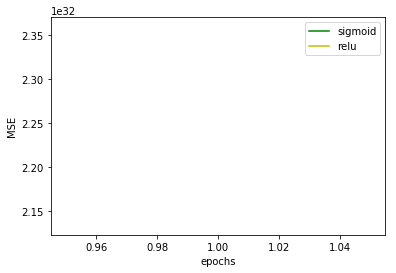

In [10]:
n_decay = 10
lear_decay = np.logspace(-6,0,n_decay)
sgd = SGD(lr=0.2, decay=1e-6)


#sigmoid
model = Sequential()
model.add(Dense(200, input_dim=X_train_scaled.shape[1], init='uniform'))
model.add(Activation('sigmoid'))

model.add(Dense(1, init='uniform'))
model.add(Activation('linear'))

model.compile(optimizer=sgd,loss='mean_squared_error')

hist = model.fit(X_train_scaled.as_matrix(), y_train.as_matrix(), nb_epoch=300,
verbose = 1, validation_data=(X_test_scaled.as_matrix(), y_test.as_matrix()))
listaloss = []

for i in range(300):
    listaloss.append(hist.history['loss'][i])





#relu
model = Sequential()
model.add(Dense(200, input_dim=X_train_scaled.shape[1], init='uniform'))
model.add(Activation('relu'))

model.add(Dense(1, init='uniform'))
model.add(Activation('linear'))

model.compile(optimizer=sgd,loss='mean_squared_error')

hist = model.fit(X_train_scaled.as_matrix(), y_train.as_matrix(), nb_epoch=300,
verbose=1, validation_data=(X_test_scaled.as_matrix(), y_test.as_matrix()))


listaloss2 = []

for i in range(300):
    listaloss2.append(hist.history['loss'][i])

plt.plot(range(301)[1:],listaloss,'g',label='sigmoid')
plt.plot(range(301)[1:],listaloss2,'y',label='relu')
plt.ylabel('MSE')
plt.xlabel('epochs')
plt.legend(loc='upper right')
plt.show()









## (h)

In [11]:
n_decay = 21
momentum = np.linspace(0,1,n_decay)
sgd = SGD(lr=0.2,momentum=0.9)

## (i)

In [12]:
n_batches = 21
batch_sizes = np.round(np.linspace(1,X_train_scaled.shape[0],n_batches))
model.fit(X_train_scaled.as_matrix(),y_train.as_matrix(),batch_size=50,nb_epoch=300)

Epoch 1/300
379/379 [==============================] - 0s - loss: nan     
Epoch 2/300
379/379 [==============================] - 0s - loss: nan     
Epoch 3/300
379/379 [==============================] - 0s - loss: nan     
Epoch 4/300
379/379 [==============================] - 0s - loss: nan     
Epoch 5/300
379/379 [==============================] - 0s - loss: nan     
Epoch 6/300
379/379 [==============================] - 0s - loss: nan     
Epoch 7/300
379/379 [==============================] - 0s - loss: nan     
Epoch 8/300
379/379 [==============================] - 0s - loss: nan     
Epoch 9/300
379/379 [==============================] - 0s - loss: nan     
Epoch 10/300
379/379 [==============================] - 0s - loss: nan     
Epoch 11/300
379/379 [==============================] - 0s - loss: nan     
Epoch 12/300
379/379 [==============================] - 0s - loss: nan     
Epoch 13/300
379/379 [==============================] - 0s - loss: nan     
Epoch 14/300
379/379 

379/379 [==============================] - 0s - loss: nan     
Epoch 109/300
379/379 [==============================] - 0s - loss: nan     
Epoch 110/300
379/379 [==============================] - 0s - loss: nan     
Epoch 111/300
379/379 [==============================] - 0s - loss: nan     
Epoch 112/300
379/379 [==============================] - 0s - loss: nan     
Epoch 113/300
379/379 [==============================] - 0s - loss: nan     
Epoch 114/300
379/379 [==============================] - 0s - loss: nan     
Epoch 115/300
379/379 [==============================] - 0s - loss: nan     
Epoch 116/300
379/379 [==============================] - 0s - loss: nan     
Epoch 117/300
379/379 [==============================] - 0s - loss: nan     
Epoch 118/300
379/379 [==============================] - 0s - loss: nan     
Epoch 119/300
379/379 [==============================] - 0s - loss: nan     
Epoch 120/300
379/379 [==============================] - 0s - loss: nan     
Epoch 121/300

379/379 [==============================] - 0s - loss: nan     
Epoch 215/300
379/379 [==============================] - 0s - loss: nan     
Epoch 216/300
379/379 [==============================] - 0s - loss: nan     
Epoch 217/300
379/379 [==============================] - 0s - loss: nan     
Epoch 218/300
379/379 [==============================] - 0s - loss: nan     
Epoch 219/300
379/379 [==============================] - 0s - loss: nan     
Epoch 220/300
379/379 [==============================] - 0s - loss: nan     
Epoch 221/300
379/379 [==============================] - 0s - loss: nan     
Epoch 222/300
379/379 [==============================] - 0s - loss: nan     
Epoch 223/300
379/379 [==============================] - 0s - loss: nan     
Epoch 224/300
379/379 [==============================] - 0s - loss: nan     
Epoch 225/300
379/379 [==============================] - 0s - loss: nan     
Epoch 226/300
379/379 [==============================] - 0s - loss: nan     
Epoch 227/300

## (j)

In [13]:
from keras.optimizers import SGD, Adam, RMSprop, Adagrad, Adadelta
moptimizer = Adagrad(lr=0.01)
model.compile(optimizer=moptimizer)
model.fit(X_train_scaled.as_matrix(),y_train_scaled.as_matrix())

TypeError: compile() takes at least 3 arguments (2 given)

## (k)

In [ ]:
model = Sequential()
#la regularization se debe incorporar a cada capa separadamente
idim=X_train_scaled.shape[1]
model.add(Dense(200,input_dim=idim,init='uniform',W_regularizer=l2(0.01)))
model.add(Activation('sigmoid'))
model.add(Dense(1, init='uniform',W_regularizer=l2(0.01)))
model.add(Activation('linear'))

## (l)

In [ ]:
from keras.layers import Dropout
model = Sequential()
model.add(Dropout(0.2))
idim=X_train_scaled.shape[1]
model.add(Dense(200,input_dim=idim,init='uniform'))
model.add(Activation('sigmoid'))
model.add(Dense(1, init='uniform'))
model.add(Activation('linear'))

## (m)